<a href="https://colab.research.google.com/github/VVKate/Neural_University_HomeWorks/blob/main/3_%D0%A1%D0%B2%D1%91%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнеее задание: Июльский курс (2020). Pro. Занятие 3
# Свёрточные нейронные сети
## Верхошинская Катерина Викторовна

## **LIGHT**


### **Вариант 2**

Провести серию экспериментов по подбору гиперпараметров нейронной сети, созданной на занятии.

1.   Поменять количество нейронов в сверточных слоях, использовав следующие значения:
 *   один слой 2 фильтров
 *   один слой  4 фильтров
 *   один слой  16 фильтров
2.   Поменять активационную функцию в скрытых слоях с relu на linear
3.   Поменять размеры batch_size:
 *   10
 *   100
 *   Вся база (48000)
4.   Записать в таблицу получившиеся точности.
5.   Написать выводы по результатам проведенных тестов.







In [ ]:
from tensorflow.keras.datasets import mnist #Загружаем базу mnist
from tensorflow.keras.datasets import cifar10 #Загружаем базу cifar10
from tensorflow.keras.datasets import cifar100 #Загружаем базу cifar100

from tensorflow.keras.models import Sequential #Сеть прямого распространения
#Базовые слои для счёрточных сетей
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator # работа с изображениями
from tensorflow.keras.optimizers import Adam, Adadelta # оптимизаторы
from tensorflow.keras import utils #Используем дял to_categoricall
from tensorflow.keras.preprocessing import image #Для отрисовки изображений
from google.colab import files #Для загрузки своей картинки
import numpy as np #Библиотека работы с массивами
import pandas as pd # Подключаем библиотеку Pandas
import matplotlib.pyplot as plt #Для отрисовки графиков
from PIL import Image #Для отрисовки изображений
import random #Для генерации случайных чисел 
import math # Для округления
import os #Для работы с файлами 
# подключем диск
from google.colab import drive

%matplotlib inline

In [ ]:
#Загружаем MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

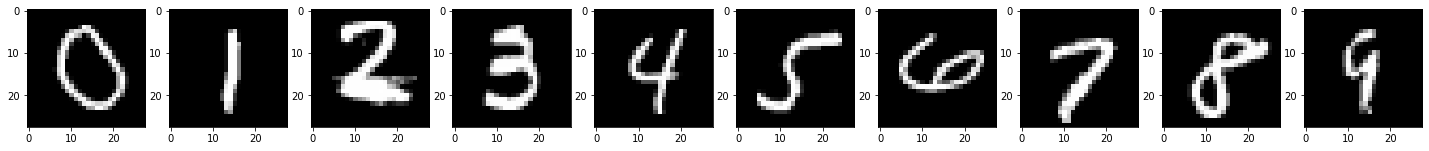

In [ ]:
#Выводим для примера картинки по каждому классу

fig, axs = plt.subplots(1, 10, figsize=(25, 3)) #Создаем полотно из 10 графиков
for i in range(10): #Проходим по классам от 0 до 9
  label_indexes = np.where(y_train==i)[0] #Получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) #Случайным образом выбираем из списка индекс
  img = x_train[index] #Выбираем из x_train нужное изображение
  axs[i].imshow(Image.fromarray(img), cmap='gray') #Отображаем изображение i-ым графиков

plt.show() #Показываем изображения

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
#Превращаем y_train и y_test сетей в формат one hot encoding
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

#Меняем формат данных MNIST
#Надо добавить в конце размерность 1
#Чтобы свёрточная сеть понимала, что это чёрно-белые данные
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
# Посмотрим форматы выборок перед обучением
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


**Нейронная сеть**



Epoch 1/15
469/469 [==============================] - 3s 7ms/step - loss: 0.1546 - accuracy: 0.9530 - val_loss: 0.0435 - val_accuracy: 0.9854
Epoch 2/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0512 - accuracy: 0.9844 - val_loss: 0.0365 - val_accuracy: 0.9868
Epoch 3/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0362 - accuracy: 0.9878 - val_loss: 0.0334 - val_accuracy: 0.9891
Epoch 4/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0271 - accuracy: 0.9913 - val_loss: 0.0317 - val_accuracy: 0.9882
Epoch 5/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0204 - accuracy: 0.9933 - val_loss: 0.0283 - val_accuracy: 0.9907
Epoch 6/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0185 - accuracy: 0.9935 - val_loss: 0.0311 - val_accuracy: 0.9911
Epoch 7/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0156 - accuracy: 0.9947 - val_loss: 0.0294 - val_accuracy: 0.9908
Epoch 

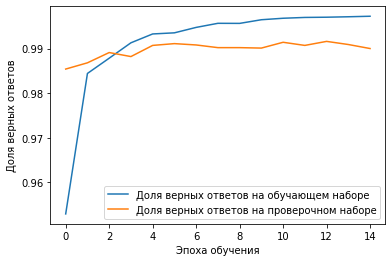

In [ ]:
#задаём batch_size
batch_size = 128 

#Создаем последовательную модель
model = Sequential()
#Слой пакетной нормализации
model.add(BatchNormalization(input_shape=(28, 28, 1)))
#Первый сверточный слой
model.add(Conv2D(32, 3, padding='same', activation='relu'))
#Второй сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
#Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.25))

model.add(Flatten())
#Полносвязный слой для классификации
model.add(Dense(256, activation='relu'))
#Слой регуляризации Dropout
model.add(Dropout(0.25))
#Выходной полносвязный слой
model.add(Dense(10, activation='softmax'))

#Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#Обучаем сеть на данных mnist
history = model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=15,
                    validation_data=(x_test, y_test),
                    verbose=1)

#Отображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_15 (Batc (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 256)             

**Определение цифр из тестовой выборки**



In [ ]:
#Выбираем номер пример
n = 2020
#Получаем выход сети на этом примере
prediction = model.predict(x_test)

#Выводим на экран результаты
print("Выход сети: ", prediction[n])
print("Распознанная цифра: ", np.argmax(prediction[n]))
print("Верный ответ: ", np.argmax(y_test[n]))

Выход сети:  [4.2643950e-26 7.4445795e-19 2.7367089e-22 1.0000000e+00 9.2431552e-25
 8.9586272e-12 2.7424331e-24 6.2321096e-24 8.1961050e-18 1.2978138e-15]
Распознанная цифра:  3
Верный ответ:  3


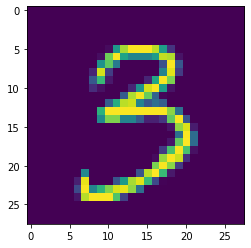

In [ ]:
plt.imshow(x_test[n,:,:,0])

#### 1.   Поменять количество нейронов в сверточных слоях, использовав следующие значения:
 *   один слой 2 фильтров
 *   один слой  4 фильтров
 *   один слой  16 фильтров

In [ ]:
data = [[32, 2, 'relu', 128, round(model.evaluate(x_test, y_test, verbose = 0)[1], 3)]]
data

[[32, 2, 'relu', 128, 0.99]]

Epoch 1/15
469/469 [==============================] - 2s 4ms/step - loss: 0.4811 - accuracy: 0.8459 - val_loss: 0.1713 - val_accuracy: 0.9448
Epoch 2/15
469/469 [==============================] - 2s 4ms/step - loss: 0.2428 - accuracy: 0.9234 - val_loss: 0.1275 - val_accuracy: 0.9615
Epoch 3/15
469/469 [==============================] - 2s 3ms/step - loss: 0.1987 - accuracy: 0.9365 - val_loss: 0.1059 - val_accuracy: 0.9667
Epoch 4/15
469/469 [==============================] - 2s 3ms/step - loss: 0.1751 - accuracy: 0.9443 - val_loss: 0.0952 - val_accuracy: 0.9695
Epoch 5/15
469/469 [==============================] - 2s 3ms/step - loss: 0.1608 - accuracy: 0.9491 - val_loss: 0.0841 - val_accuracy: 0.9735
Epoch 6/15
469/469 [==============================] - 1s 3ms/step - loss: 0.1425 - accuracy: 0.9549 - val_loss: 0.0792 - val_accuracy: 0.9736
Epoch 7/15
469/469 [==============================] - 2s 3ms/step - loss: 0.1329 - accuracy: 0.9567 - val_loss: 0.0720 - val_accuracy: 0.9767
Epoch 

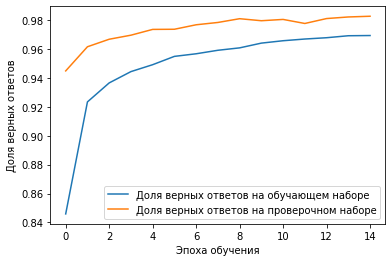

Epoch 1/15
469/469 [==============================] - 2s 4ms/step - loss: 0.3848 - accuracy: 0.8799 - val_loss: 0.1538 - val_accuracy: 0.9515
Epoch 2/15
469/469 [==============================] - 2s 4ms/step - loss: 0.1906 - accuracy: 0.9402 - val_loss: 0.0974 - val_accuracy: 0.9676
Epoch 3/15
469/469 [==============================] - 2s 3ms/step - loss: 0.1430 - accuracy: 0.9559 - val_loss: 0.0732 - val_accuracy: 0.9770
Epoch 4/15
469/469 [==============================] - 2s 3ms/step - loss: 0.1140 - accuracy: 0.9638 - val_loss: 0.0621 - val_accuracy: 0.9804
Epoch 5/15
469/469 [==============================] - 2s 3ms/step - loss: 0.0976 - accuracy: 0.9689 - val_loss: 0.0546 - val_accuracy: 0.9824
Epoch 6/15
469/469 [==============================] - 2s 3ms/step - loss: 0.0841 - accuracy: 0.9724 - val_loss: 0.0503 - val_accuracy: 0.9840
Epoch 7/15
469/469 [==============================] - 2s 3ms/step - loss: 0.0758 - accuracy: 0.9760 - val_loss: 0.0502 - val_accuracy: 0.9840
Epoch 

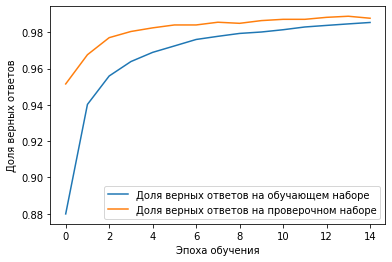

Epoch 1/15
469/469 [==============================] - 2s 4ms/step - loss: 0.2484 - accuracy: 0.9228 - val_loss: 0.0817 - val_accuracy: 0.9735
Epoch 2/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0943 - accuracy: 0.9708 - val_loss: 0.0520 - val_accuracy: 0.9827
Epoch 3/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0675 - accuracy: 0.9790 - val_loss: 0.0443 - val_accuracy: 0.9849
Epoch 4/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0517 - accuracy: 0.9836 - val_loss: 0.0428 - val_accuracy: 0.9857
Epoch 5/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0453 - accuracy: 0.9852 - val_loss: 0.0394 - val_accuracy: 0.9873
Epoch 6/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0364 - accuracy: 0.9881 - val_loss: 0.0395 - val_accuracy: 0.9863
Epoch 7/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0333 - accuracy: 0.9890 - val_loss: 0.0379 - val_accuracy: 0.9882
Epoch 

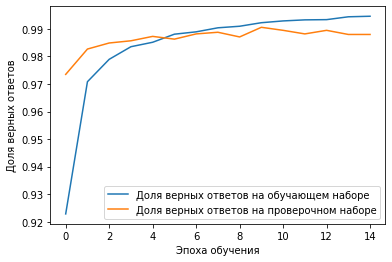

In [ ]:
# один сверточный слой
N = [2, 4, 16] # Кол-во нейронов(фильтров) в сверточных слоях
for i in N:
    #Создаем последовательную модель
    model = Sequential()
    #Слой пакетной нормализации
    model.add(BatchNormalization(input_shape=(28, 28, 1)))
    #Первый сверточный слой
    model.add(Conv2D(i, 3, padding='same', activation='relu'))
    #Первый слой подвыборки
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #Слой регуляризации Dropout
    model.add(Dropout(0.25))

    model.add(Flatten())
    #Полносвязный слой для классификации
    model.add(Dense(256, activation='relu'))
    #Слой регуляризации Dropout
    model.add(Dropout(0.25))
    #Выходной полносвязный слой
    model.add(Dense(10, activation='softmax'))

    #Компилируем сеть
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    #Обучаем сеть на данных mnist
    history = model.fit(x_train, 
                        y_train, 
                        batch_size=batch_size, 
                        epochs=15,
                        validation_data=(x_test, y_test),
                        verbose=1)

    data = data + [[i, 1, 'relu', 128, round(model.evaluate(x_test, y_test, verbose = 0)[1], 3)]]
    #Оображаем график точности обучения
    plt.plot(history.history['accuracy'], 
    label='Доля верных ответов на обучающем наборе')
    plt.plot(history.history['val_accuracy'], 
    label='Доля верных ответов на проверочном наборе')
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Доля верных ответов')
    plt.legend()
    plt.show() 


#### 2. Поменять активационную функцию в скрытых слоях с relu на linear

Epoch 1/15
469/469 [==============================] - 2s 4ms/step - loss: 0.2612 - accuracy: 0.9231 - val_loss: 0.1204 - val_accuracy: 0.9636
Epoch 2/15
469/469 [==============================] - 2s 4ms/step - loss: 0.1242 - accuracy: 0.9623 - val_loss: 0.0935 - val_accuracy: 0.9711
Epoch 3/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0992 - accuracy: 0.9694 - val_loss: 0.0853 - val_accuracy: 0.9734
Epoch 4/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0901 - accuracy: 0.9717 - val_loss: 0.0758 - val_accuracy: 0.9741
Epoch 5/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0814 - accuracy: 0.9741 - val_loss: 0.0749 - val_accuracy: 0.9766
Epoch 6/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0761 - accuracy: 0.9753 - val_loss: 0.0803 - val_accuracy: 0.9757
Epoch 7/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0734 - accuracy: 0.9765 - val_loss: 0.0750 - val_accuracy: 0.9775
Epoch 

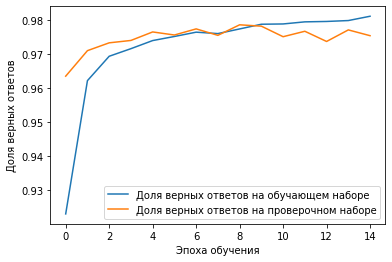

In [ ]:
# один сверточный слой
#Создаем последовательную модель
model = Sequential()
#Слой пакетной нормализации
model.add(BatchNormalization(input_shape=(28, 28, 1)))
#Первый сверточный слой
model.add(Conv2D(32, 3, padding='same', activation='linear'))
#Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.25))

model.add(Flatten())
#Полносвязный слой для классификации
model.add(Dense(256, activation='linear'))
#Слой регуляризации Dropout
model.add(Dropout(0.25))
#Выходной полносвязный слой
model.add(Dense(10, activation='softmax'))

#Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#Обучаем сеть на данных mnist
history = model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=15,
                    validation_data=(x_test, y_test),
                    verbose=1)

data = data + [[32, 2, 'linear', 128, round(model.evaluate(x_test, y_test, verbose = 0)[1], 3)]]


#Оображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

#### 3.   Поменять размеры batch_size:
 *   10
 *   100
 *   Вся база (48000)

Epoch 1/15
6000/6000 [==============================] - 19s 3ms/step - loss: 0.1196 - accuracy: 0.9639 - val_loss: 0.0445 - val_accuracy: 0.9864
Epoch 2/15
6000/6000 [==============================] - 18s 3ms/step - loss: 0.0517 - accuracy: 0.9843 - val_loss: 0.0376 - val_accuracy: 0.9884
Epoch 3/15
6000/6000 [==============================] - 18s 3ms/step - loss: 0.0350 - accuracy: 0.9892 - val_loss: 0.0342 - val_accuracy: 0.9895
Epoch 4/15
6000/6000 [==============================] - 18s 3ms/step - loss: 0.0286 - accuracy: 0.9912 - val_loss: 0.0278 - val_accuracy: 0.9911
Epoch 5/15
6000/6000 [==============================] - 18s 3ms/step - loss: 0.0223 - accuracy: 0.9925 - val_loss: 0.0375 - val_accuracy: 0.9895
Epoch 6/15
6000/6000 [==============================] - 18s 3ms/step - loss: 0.0207 - accuracy: 0.9933 - val_loss: 0.0333 - val_accuracy: 0.9908
Epoch 7/15
6000/6000 [==============================] - 18s 3ms/step - loss: 0.0155 - accuracy: 0.9949 - val_loss: 0.0292 - val_ac

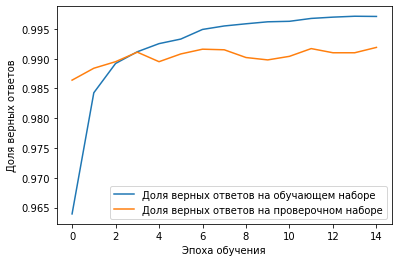

Epoch 1/15
600/600 [==============================] - 3s 6ms/step - loss: 0.1568 - accuracy: 0.9518 - val_loss: 0.0450 - val_accuracy: 0.9852
Epoch 2/15
600/600 [==============================] - 3s 5ms/step - loss: 0.0526 - accuracy: 0.9840 - val_loss: 0.0312 - val_accuracy: 0.9898
Epoch 3/15
600/600 [==============================] - 3s 5ms/step - loss: 0.0351 - accuracy: 0.9883 - val_loss: 0.0279 - val_accuracy: 0.9912
Epoch 4/15
600/600 [==============================] - 3s 5ms/step - loss: 0.0263 - accuracy: 0.9919 - val_loss: 0.0245 - val_accuracy: 0.9914
Epoch 5/15
600/600 [==============================] - 3s 5ms/step - loss: 0.0214 - accuracy: 0.9929 - val_loss: 0.0280 - val_accuracy: 0.9912
Epoch 6/15
600/600 [==============================] - 3s 5ms/step - loss: 0.0201 - accuracy: 0.9936 - val_loss: 0.0267 - val_accuracy: 0.9915
Epoch 7/15
600/600 [==============================] - 3s 5ms/step - loss: 0.0164 - accuracy: 0.9948 - val_loss: 0.0321 - val_accuracy: 0.9913
Epoch 

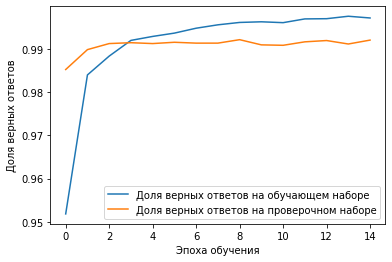

In [ ]:
# два сверточных слоя
N_batch_size = [10,100]
for i in N_batch_size:
    #Создаем последовательную модель
    model = Sequential()
    #Слой пакетной нормализации
    model.add(BatchNormalization(input_shape=(28, 28, 1)))
    #Первый сверточный слой
    model.add(Conv2D(32, 3, padding='same', activation='relu'))
    #Второй сверточный слой
    model.add(Conv2D(32, 3, padding='same', activation='relu'))
    #Первый слой подвыборки
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #Слой регуляризации Dropout
    model.add(Dropout(0.25))

    model.add(Flatten())
    #Полносвязный слой для классификации
    model.add(Dense(256, activation='relu'))
    #Слой регуляризации Dropout
    model.add(Dropout(0.25))
    #Выходной полносвязный слой
    model.add(Dense(10, activation='softmax'))

    #Компилируем сеть
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    #Обучаем сеть на данных mnist
    history = model.fit(x_train, 
                        y_train, 
                        batch_size=i,  # Меняем batch_size
                        epochs=15,
                        validation_data=(x_test, y_test),
                        verbose=1)

    data = data + [[32, 2, 'relu', i, round(model.evaluate(x_test, y_test, verbose = 0)[1], 3)]]
    #Оображаем график точности обучения
    plt.plot(history.history['accuracy'], 
    label='Доля верных ответов на обучающем наборе')
    plt.plot(history.history['val_accuracy'], 
    label='Доля верных ответов на проверочном наборе')
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Доля верных ответов')
    plt.legend()
    plt.show()
    

Epoch 1/15
2/2 [==============================] - 1s 262ms/step - loss: 2.3657 - accuracy: 0.1557 - val_loss: 2.2613 - val_accuracy: 0.6479
Epoch 2/15
2/2 [==============================] - 0s 200ms/step - loss: 1.5392 - accuracy: 0.5797 - val_loss: 1.0746 - val_accuracy: 0.7509
Epoch 3/15
2/2 [==============================] - 0s 201ms/step - loss: 0.9675 - accuracy: 0.7229 - val_loss: 0.9076 - val_accuracy: 0.8167
Epoch 4/15
2/2 [==============================] - 0s 199ms/step - loss: 0.7276 - accuracy: 0.7780 - val_loss: 1.1592 - val_accuracy: 0.7901
Epoch 5/15
2/2 [==============================] - 0s 199ms/step - loss: 0.5915 - accuracy: 0.8101 - val_loss: 1.1294 - val_accuracy: 0.8066
Epoch 6/15
2/2 [==============================] - 0s 199ms/step - loss: 0.5167 - accuracy: 0.8356 - val_loss: 0.9144 - val_accuracy: 0.8467
Epoch 7/15
2/2 [==============================] - 0s 198ms/step - loss: 0.4652 - accuracy: 0.8536 - val_loss: 0.9429 - val_accuracy: 0.8424
Epoch 8/15
2/2 [====

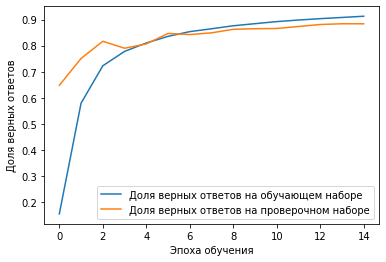

In [ ]:
# batch_size= 48000  
 
#Создаем последовательную модель
model = Sequential()
#Слой пакетной нормализации
model.add(BatchNormalization(input_shape=(28, 28, 1)))
#Первый сверточный слой
model.add(Conv2D(16, 3, padding='same', activation='relu'))
#Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.25))

model.add(Flatten())
#Полносвязный слой для классификации
model.add(Dense(256, activation='relu'))
#Слой регуляризации Dropout
model.add(Dropout(0.25))
#Выходной полносвязный слой
model.add(Dense(10, activation='softmax'))

#Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#Обучаем сеть на данных mnist
history = model.fit(x_train, 
                    y_train, 
                    batch_size= 48000,
                    epochs=15,
                    validation_data=(x_test, y_test),
                    verbose=1)

data = data + [[16, 1, 'relu', 48000, round(model.evaluate(x_test, y_test, verbose = 0)[1], 3)]]

#Оображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

#### 4. Записать в таблицу получившиеся точности.

**Таблица:**
* **neurons(filters)** - Количество нейронов (фильтров)
* **number_of_Conv2D_layers** - Количество слоев conv2_d 
* **activation** - Функция активации
* **batch_size** - Размер batch_size
* **val_accuracy** - Точность классификации данных на проверочной выборке

In [ ]:
df = pd.DataFrame(data, columns = ['neurons(filters)', 'number_of_Conv2D_layers', 'activation', 'batch_size','val_accuracy'])
df

,neurons(filters),number_of_Conv2D_layers,activation,batch_size,val_accuracy
0,32,2,relu,128,0.990
1,2,1,relu,128,0.983
2,4,1,relu,128,0.988
3,16,1,relu,128,0.988
4,32,2,linear,128,0.975
5,32,2,relu,10,0.992
6,32,2,relu,100,0.992
7,16,1,relu,48000,0.884


#### 5. Написать выводы по результатам проведенных тестов.

ВЫВОДЫ: 
1. Для большого batch_size = 48000, архитектура с двумя сверточными слоями оказалась слижком сложной и произожло переполнение(нехватка памяти, в данном случае видеокарты). При изменение архитектуры на 1 сверточный слой и уменьшением количества фильтров в 2 раза убрало эту ошибку. Вывод - важно правильно подбирать архитектуру к разным данным. И большом размере батча, архитектуру стоит упрощать.

2.  Как видно из графика самая маленькая точность классификации данных на проверочной выборке, при 16 фильтрах в сверточном слое, причем если этот слой всего один. Как можно заметить все экперементы где сверточных слоев 2, точность выше, чем там где слой всего один. Размер batch_size, при этом играет роль - чем больше тем точность меньше.

3. При изменении активацианной функции с relu на linear даже при одном сверточном слое переобучение не замечено и точность классификации данных на проверочной выборке высокая, что говорит о хорошей эфективности данной функции активации на данной архитектуре.

4. Как видно из графиков, подозрение на переобучение есть практически во всех вариантах, но в сетях с одним сверточным слоем оно наступает быстрее. Итог - два лучше чем один. А если использовать один сверточный слой, то из п.3 следует что лучше использовать активационную функцию linear.

5. Судя по графикам, маленький размер batch_size - приводит к переобучению быстрее, хотя из проведенных тестов видно что на размер точности он не сильно повлиял(10 или 100), хотя 100 вышел на переобучение быстрее. batch_size = 48 000 вызвал проблему снехваткой памяти и пришлось менять(упрощать) архитектуру. Что еще раз говорит о том как важно правильно подбирать архитектуру к разным данным. И большом размере батча, архитектуру стоит упрощать.


## **PRO**

### **Вариант 1**
Провести ряд экспериментов с архитектурой нейронных сетей.
1.  Исследовать влияние количества слоев conv2_d.
2.  Исследовать влияние количества нейронов.
3.  Исследовать влияние MaxPooling2D в сети.
4.  Исследовать влияние Dropout.
5.  Написать выводы по результатам проведенных тестов.




In [ ]:
from tensorflow.keras.datasets import cifar10 #Загружаем базу cifar10

from tensorflow.keras.models import Sequential #Сеть прямого распространения
#Базовые слои для счёрточных сетей
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator # работа с изображениями
from tensorflow.keras.optimizers import Adam, Adadelta # оптимизаторы
from tensorflow.keras import utils #Используем дял to_categoricall
from tensorflow.keras.preprocessing import image #Для отрисовки изображений
from google.colab import files #Для загрузки своей картинки
import numpy as np #Библиотека работы с массивами
import matplotlib.pyplot as plt #Для отрисовки графиков
from PIL import Image #Для отрисовки изображений
import random #Для генерации случайных чисел 
import math # Для округления
import os #Для работы с файлами 

%matplotlib inline

In [ ]:
#Загружаем cifar10
(x_train10, y_train10), (x_test10, y_test10) = cifar10.load_data()

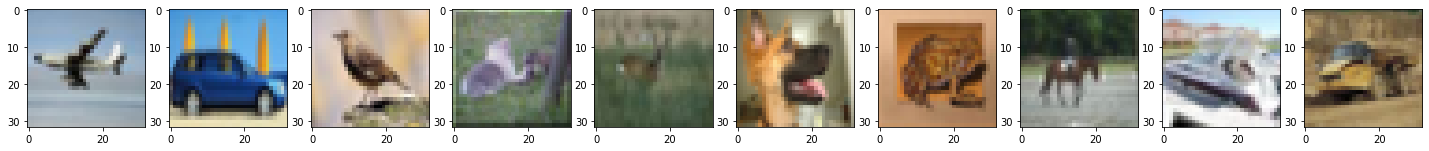

In [ ]:
#Определяем названия классов по порядку
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

#Выводим для примера картинки по каждому классу

fig, axs = plt.subplots(1, 10, figsize=(25, 3)) #Создаем полотно из 10 графиков
for i in range(10): #Проходим по классам от 0 до 9
  label_indexes = np.where(y_train10==i)[0] #Получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) #Случайным образом выбираем из списка индекс
  img = x_train10[index] #Выбираем из x_train нужное изображение
  axs[i].imshow(Image.fromarray(img)) #Отображаем изображение i-ым графиков

plt.show() #Показываем изображения

In [ ]:
#Превращаем y_train и y_test сетей в формат one hot encoding
y_train10 = utils.to_categorical(y_train10, 10)
y_test10 = utils.to_categorical(y_test10, 10)

# Посмотрим размеры выборок перед обучением
print(x_train10.shape)
print(x_test10.shape)
print(y_train10.shape)
print(y_test10.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)


In [ ]:
batch_size = 128

In [ ]:
data = []
data

[]

Epoch 1/15
391/391 [==============================] - 3s 9ms/step - loss: 1.8330 - accuracy: 0.3514 - val_loss: 1.7134 - val_accuracy: 0.3880
Epoch 2/15
391/391 [==============================] - 3s 8ms/step - loss: 1.6481 - accuracy: 0.4201 - val_loss: 1.6452 - val_accuracy: 0.4178
Epoch 3/15
391/391 [==============================] - 3s 8ms/step - loss: 1.5801 - accuracy: 0.4464 - val_loss: 1.5626 - val_accuracy: 0.4469
Epoch 4/15
391/391 [==============================] - 3s 8ms/step - loss: 1.5341 - accuracy: 0.4612 - val_loss: 1.5370 - val_accuracy: 0.4553
Epoch 5/15
391/391 [==============================] - 3s 8ms/step - loss: 1.4964 - accuracy: 0.4737 - val_loss: 1.5259 - val_accuracy: 0.4616
Epoch 6/15
391/391 [==============================] - 3s 8ms/step - loss: 1.4610 - accuracy: 0.4872 - val_loss: 1.5312 - val_accuracy: 0.4597
Epoch 7/15
391/391 [==============================] - 3s 8ms/step - loss: 1.4345 - accuracy: 0.4950 - val_loss: 1.5270 - val_accuracy: 0.4581
Epoch 

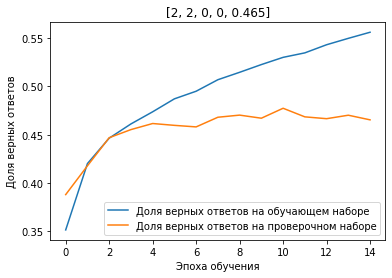

Epoch 1/15
391/391 [==============================] - 3s 9ms/step - loss: 1.7293 - accuracy: 0.3840 - val_loss: 1.4822 - val_accuracy: 0.4760
Epoch 2/15
391/391 [==============================] - 3s 8ms/step - loss: 1.3922 - accuracy: 0.5050 - val_loss: 1.3577 - val_accuracy: 0.5184
Epoch 3/15
391/391 [==============================] - 3s 8ms/step - loss: 1.2834 - accuracy: 0.5439 - val_loss: 1.3191 - val_accuracy: 0.5348
Epoch 4/15
391/391 [==============================] - 3s 8ms/step - loss: 1.2160 - accuracy: 0.5682 - val_loss: 1.3014 - val_accuracy: 0.5366
Epoch 5/15
391/391 [==============================] - 3s 8ms/step - loss: 1.1625 - accuracy: 0.5876 - val_loss: 1.2817 - val_accuracy: 0.5427
Epoch 6/15
391/391 [==============================] - 3s 8ms/step - loss: 1.1132 - accuracy: 0.6047 - val_loss: 1.3066 - val_accuracy: 0.5428
Epoch 7/15
391/391 [==============================] - 3s 8ms/step - loss: 1.0763 - accuracy: 0.6202 - val_loss: 1.3072 - val_accuracy: 0.5468
Epoch 

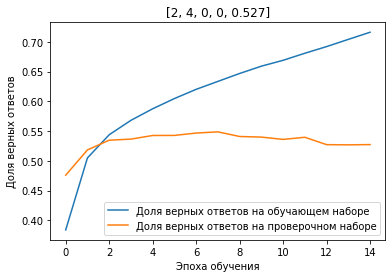

Epoch 1/15
391/391 [==============================] - 4s 11ms/step - loss: 1.4623 - accuracy: 0.4802 - val_loss: 1.2150 - val_accuracy: 0.5697
Epoch 2/15
391/391 [==============================] - 4s 11ms/step - loss: 1.0927 - accuracy: 0.6159 - val_loss: 1.1415 - val_accuracy: 0.5971
Epoch 3/15
391/391 [==============================] - 4s 11ms/step - loss: 0.9154 - accuracy: 0.6811 - val_loss: 1.1017 - val_accuracy: 0.6100
Epoch 4/15
391/391 [==============================] - 4s 11ms/step - loss: 0.7717 - accuracy: 0.7324 - val_loss: 1.0814 - val_accuracy: 0.6293
Epoch 5/15
391/391 [==============================] - 4s 11ms/step - loss: 0.6356 - accuracy: 0.7800 - val_loss: 1.1508 - val_accuracy: 0.6273
Epoch 6/15
391/391 [==============================] - 4s 11ms/step - loss: 0.5049 - accuracy: 0.8258 - val_loss: 1.2710 - val_accuracy: 0.6161
Epoch 7/15
391/391 [==============================] - 4s 11ms/step - loss: 0.3798 - accuracy: 0.8716 - val_loss: 1.4173 - val_accuracy: 0.6106

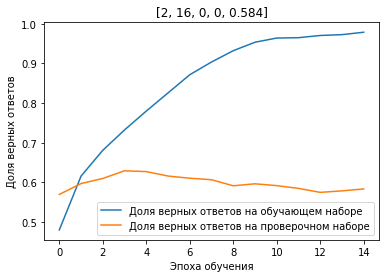

In [ ]:
# Эксперементируем на двух сверточных слоях без Dropout без MaxPooling2D
# при разном количестве нейронов (фильтров)

F = [2, 4, 16]  # Кол-во нейронов(фильтров) в сверточных слоях

for f_ in F:
    # Создаем последовательную модель
    model = Sequential()
    model.add(BatchNormalization(input_shape=(32, 32, 3)))
    # Первый сверточный слой
    model.add(Conv2D(f_, (3, 3), padding='same', activation='relu'))
    # Второй сверточный слой
    model.add(Conv2D(f_, (3, 3), padding='same', activation='relu'))

    # Слой преобразования данных из 2D представления в плоское
    model.add(Flatten())
    # Полносвязный слой для классификации
    model.add(Dense(64, activation='relu'))
    # Выходной полносвязный слой
    model.add(Dense(10, activation='softmax'))

    # Компилируем сеть
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    # Обучаем сеть на данных mnist
    history = model.fit(x_train10,
                        y_train10,
                        batch_size=128,
                        epochs=15,
                        validation_data=(x_test10, y_test10),
                        verbose=1)

    data = data + [[2, f_, 0, 0, round(model.evaluate(x_test10, y_test10, verbose=0)[1], 3)]]
    #Оображаем график точности обучения
    plt.plot(history.history['accuracy'], 
    label='Доля верных ответов на обучающем наборе')
    plt.plot(history.history['val_accuracy'], 
    label='Доля верных ответов на проверочном наборе')
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Доля верных ответов')
    plt.title(data[-1])
    plt.legend()
    plt.show()



Epoch 1/15
391/391 [==============================] - 3s 8ms/step - loss: 1.8893 - accuracy: 0.3157 - val_loss: 1.7028 - val_accuracy: 0.3843
Epoch 2/15
391/391 [==============================] - 3s 8ms/step - loss: 1.6976 - accuracy: 0.3884 - val_loss: 1.6180 - val_accuracy: 0.4134
Epoch 3/15
391/391 [==============================] - 3s 8ms/step - loss: 1.6216 - accuracy: 0.4140 - val_loss: 1.5631 - val_accuracy: 0.4407
Epoch 4/15
391/391 [==============================] - 3s 8ms/step - loss: 1.5670 - accuracy: 0.4339 - val_loss: 1.5168 - val_accuracy: 0.4573
Epoch 5/15
391/391 [==============================] - 3s 8ms/step - loss: 1.5254 - accuracy: 0.4499 - val_loss: 1.4909 - val_accuracy: 0.4663
Epoch 6/15
391/391 [==============================] - 3s 8ms/step - loss: 1.4871 - accuracy: 0.4685 - val_loss: 1.4649 - val_accuracy: 0.4765
Epoch 7/15
391/391 [==============================] - 3s 7ms/step - loss: 1.4628 - accuracy: 0.4744 - val_loss: 1.4544 - val_accuracy: 0.4743
Epoch 

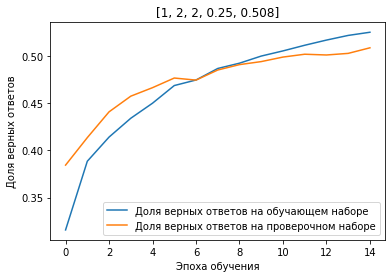

Epoch 1/15
391/391 [==============================] - 3s 8ms/step - loss: 2.0321 - accuracy: 0.2566 - val_loss: 1.7305 - val_accuracy: 0.3757
Epoch 2/15
391/391 [==============================] - 3s 8ms/step - loss: 1.7151 - accuracy: 0.3720 - val_loss: 1.5885 - val_accuracy: 0.4255
Epoch 3/15
391/391 [==============================] - 3s 8ms/step - loss: 1.6394 - accuracy: 0.4002 - val_loss: 1.5361 - val_accuracy: 0.4432
Epoch 4/15
391/391 [==============================] - 3s 8ms/step - loss: 1.5972 - accuracy: 0.4156 - val_loss: 1.5013 - val_accuracy: 0.4551
Epoch 5/15
391/391 [==============================] - 3s 8ms/step - loss: 1.5702 - accuracy: 0.4265 - val_loss: 1.4821 - val_accuracy: 0.4625
Epoch 6/15
391/391 [==============================] - 3s 8ms/step - loss: 1.5490 - accuracy: 0.4317 - val_loss: 1.4580 - val_accuracy: 0.4755
Epoch 7/15
391/391 [==============================] - 3s 8ms/step - loss: 1.5296 - accuracy: 0.4419 - val_loss: 1.4513 - val_accuracy: 0.4780
Epoch 

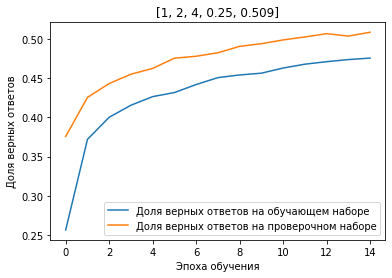

Epoch 1/15
391/391 [==============================] - 3s 8ms/step - loss: 2.0195 - accuracy: 0.2615 - val_loss: 1.6966 - val_accuracy: 0.3946
Epoch 2/15
391/391 [==============================] - 3s 8ms/step - loss: 1.7086 - accuracy: 0.3824 - val_loss: 1.5681 - val_accuracy: 0.4365
Epoch 3/15
391/391 [==============================] - 3s 8ms/step - loss: 1.6251 - accuracy: 0.4131 - val_loss: 1.5195 - val_accuracy: 0.4542
Epoch 4/15
391/391 [==============================] - 3s 8ms/step - loss: 1.5806 - accuracy: 0.4308 - val_loss: 1.4823 - val_accuracy: 0.4671
Epoch 5/15
391/391 [==============================] - 3s 8ms/step - loss: 1.5469 - accuracy: 0.4448 - val_loss: 1.4434 - val_accuracy: 0.4851
Epoch 6/15
391/391 [==============================] - 3s 8ms/step - loss: 1.5229 - accuracy: 0.4528 - val_loss: 1.4296 - val_accuracy: 0.4868
Epoch 7/15
391/391 [==============================] - 3s 8ms/step - loss: 1.5009 - accuracy: 0.4593 - val_loss: 1.4208 - val_accuracy: 0.4921
Epoch 

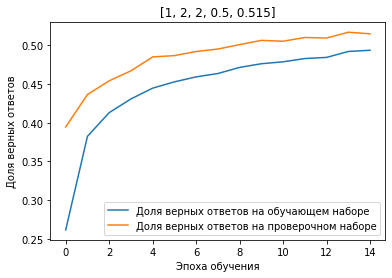

Epoch 1/15
391/391 [==============================] - 3s 9ms/step - loss: 2.0963 - accuracy: 0.2307 - val_loss: 1.8534 - val_accuracy: 0.3255
Epoch 2/15
391/391 [==============================] - 3s 8ms/step - loss: 1.8672 - accuracy: 0.3196 - val_loss: 1.7304 - val_accuracy: 0.3687
Epoch 3/15
391/391 [==============================] - 3s 8ms/step - loss: 1.7921 - accuracy: 0.3533 - val_loss: 1.6730 - val_accuracy: 0.4099
Epoch 4/15
391/391 [==============================] - 3s 8ms/step - loss: 1.7464 - accuracy: 0.3694 - val_loss: 1.6237 - val_accuracy: 0.4239
Epoch 5/15
391/391 [==============================] - 3s 8ms/step - loss: 1.7116 - accuracy: 0.3827 - val_loss: 1.6029 - val_accuracy: 0.4235
Epoch 6/15
391/391 [==============================] - 3s 8ms/step - loss: 1.6860 - accuracy: 0.3908 - val_loss: 1.5654 - val_accuracy: 0.4380
Epoch 7/15
391/391 [==============================] - 3s 8ms/step - loss: 1.6645 - accuracy: 0.3979 - val_loss: 1.5532 - val_accuracy: 0.4397
Epoch 

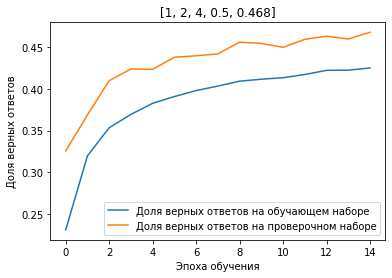

Epoch 1/15
391/391 [==============================] - 3s 9ms/step - loss: 2.0796 - accuracy: 0.2342 - val_loss: 1.7632 - val_accuracy: 0.3753
Epoch 2/15
391/391 [==============================] - 3s 8ms/step - loss: 1.8198 - accuracy: 0.3382 - val_loss: 1.6633 - val_accuracy: 0.4023
Epoch 3/15
391/391 [==============================] - 3s 8ms/step - loss: 1.7545 - accuracy: 0.3563 - val_loss: 1.6100 - val_accuracy: 0.4242
Epoch 4/15
391/391 [==============================] - 3s 8ms/step - loss: 1.7188 - accuracy: 0.3735 - val_loss: 1.5851 - val_accuracy: 0.4230
Epoch 5/15
391/391 [==============================] - 3s 8ms/step - loss: 1.6873 - accuracy: 0.3853 - val_loss: 1.5485 - val_accuracy: 0.4406
Epoch 6/15
391/391 [==============================] - 3s 8ms/step - loss: 1.6669 - accuracy: 0.3928 - val_loss: 1.5352 - val_accuracy: 0.4459
Epoch 7/15
391/391 [==============================] - 3s 8ms/step - loss: 1.6503 - accuracy: 0.4008 - val_loss: 1.5118 - val_accuracy: 0.4579
Epoch 

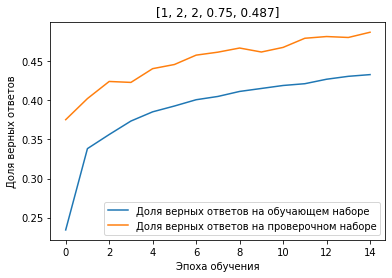

Epoch 1/15
391/391 [==============================] - 4s 9ms/step - loss: 2.2005 - accuracy: 0.1794 - val_loss: 1.9173 - val_accuracy: 0.3286
Epoch 2/15
391/391 [==============================] - 3s 8ms/step - loss: 1.9798 - accuracy: 0.2701 - val_loss: 1.8023 - val_accuracy: 0.3564
Epoch 3/15
391/391 [==============================] - 3s 8ms/step - loss: 1.9229 - accuracy: 0.2905 - val_loss: 1.7592 - val_accuracy: 0.3728
Epoch 4/15
391/391 [==============================] - 3s 8ms/step - loss: 1.8955 - accuracy: 0.3010 - val_loss: 1.7225 - val_accuracy: 0.3854
Epoch 5/15
391/391 [==============================] - 3s 8ms/step - loss: 1.8631 - accuracy: 0.3133 - val_loss: 1.6894 - val_accuracy: 0.3970
Epoch 6/15
391/391 [==============================] - 3s 8ms/step - loss: 1.8374 - accuracy: 0.3191 - val_loss: 1.6655 - val_accuracy: 0.4072
Epoch 7/15
391/391 [==============================] - 3s 8ms/step - loss: 1.8199 - accuracy: 0.3300 - val_loss: 1.6508 - val_accuracy: 0.4054
Epoch 

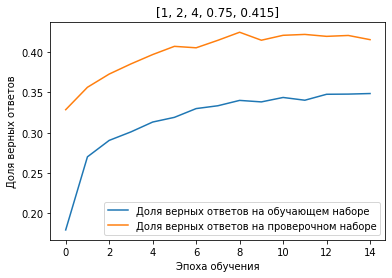

Epoch 1/15
391/391 [==============================] - 4s 9ms/step - loss: 1.7889 - accuracy: 0.3581 - val_loss: 1.5300 - val_accuracy: 0.4529
Epoch 2/15
391/391 [==============================] - 3s 8ms/step - loss: 1.4805 - accuracy: 0.4736 - val_loss: 1.3556 - val_accuracy: 0.5195
Epoch 3/15
391/391 [==============================] - 3s 8ms/step - loss: 1.3421 - accuracy: 0.5256 - val_loss: 1.2788 - val_accuracy: 0.5478
Epoch 4/15
391/391 [==============================] - 3s 8ms/step - loss: 1.2719 - accuracy: 0.5531 - val_loss: 1.2425 - val_accuracy: 0.5604
Epoch 5/15
391/391 [==============================] - 3s 8ms/step - loss: 1.2240 - accuracy: 0.5677 - val_loss: 1.2013 - val_accuracy: 0.5743
Epoch 6/15
391/391 [==============================] - 3s 8ms/step - loss: 1.1866 - accuracy: 0.5827 - val_loss: 1.1913 - val_accuracy: 0.5756
Epoch 7/15
391/391 [==============================] - 3s 8ms/step - loss: 1.1591 - accuracy: 0.5941 - val_loss: 1.1748 - val_accuracy: 0.5855
Epoch 

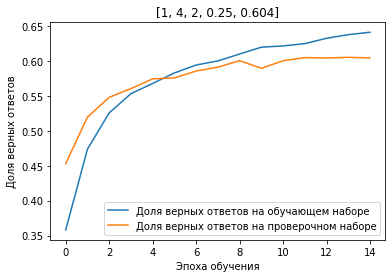

Epoch 1/15
391/391 [==============================] - 4s 9ms/step - loss: 1.8163 - accuracy: 0.3420 - val_loss: 1.5398 - val_accuracy: 0.4472
Epoch 2/15
391/391 [==============================] - 3s 8ms/step - loss: 1.5536 - accuracy: 0.4423 - val_loss: 1.4279 - val_accuracy: 0.4940
Epoch 3/15
391/391 [==============================] - 3s 8ms/step - loss: 1.4689 - accuracy: 0.4783 - val_loss: 1.3622 - val_accuracy: 0.5198
Epoch 4/15
391/391 [==============================] - 3s 8ms/step - loss: 1.4191 - accuracy: 0.4974 - val_loss: 1.3286 - val_accuracy: 0.5283
Epoch 5/15
391/391 [==============================] - 3s 8ms/step - loss: 1.3834 - accuracy: 0.5110 - val_loss: 1.3041 - val_accuracy: 0.5415
Epoch 6/15
391/391 [==============================] - 3s 8ms/step - loss: 1.3583 - accuracy: 0.5184 - val_loss: 1.2643 - val_accuracy: 0.5546
Epoch 7/15
391/391 [==============================] - 3s 8ms/step - loss: 1.3314 - accuracy: 0.5292 - val_loss: 1.2480 - val_accuracy: 0.5628
Epoch 

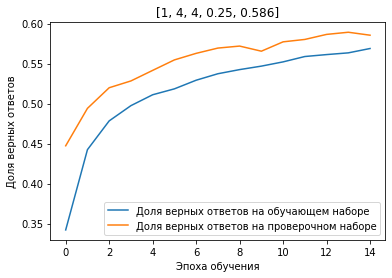

Epoch 1/15
391/391 [==============================] - 3s 9ms/step - loss: 1.7808 - accuracy: 0.3604 - val_loss: 1.5063 - val_accuracy: 0.4812
Epoch 2/15
391/391 [==============================] - 3s 8ms/step - loss: 1.5209 - accuracy: 0.4601 - val_loss: 1.3795 - val_accuracy: 0.5141
Epoch 3/15
391/391 [==============================] - 3s 8ms/step - loss: 1.4314 - accuracy: 0.4888 - val_loss: 1.3275 - val_accuracy: 0.5280
Epoch 4/15
391/391 [==============================] - 3s 8ms/step - loss: 1.3856 - accuracy: 0.5062 - val_loss: 1.3060 - val_accuracy: 0.5365
Epoch 5/15
391/391 [==============================] - 3s 8ms/step - loss: 1.3466 - accuracy: 0.5206 - val_loss: 1.2711 - val_accuracy: 0.5467
Epoch 6/15
391/391 [==============================] - 3s 8ms/step - loss: 1.3174 - accuracy: 0.5275 - val_loss: 1.2555 - val_accuracy: 0.5519
Epoch 7/15
391/391 [==============================] - 3s 8ms/step - loss: 1.2964 - accuracy: 0.5350 - val_loss: 1.2289 - val_accuracy: 0.5606
Epoch 

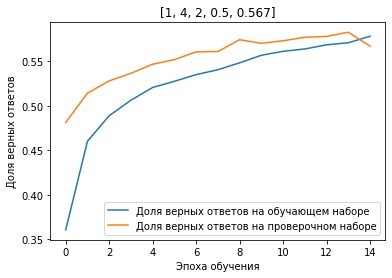

Epoch 1/15
391/391 [==============================] - 3s 9ms/step - loss: 2.0327 - accuracy: 0.2585 - val_loss: 1.7055 - val_accuracy: 0.3923
Epoch 2/15
391/391 [==============================] - 3s 8ms/step - loss: 1.7349 - accuracy: 0.3747 - val_loss: 1.5726 - val_accuracy: 0.4432
Epoch 3/15
391/391 [==============================] - 3s 8ms/step - loss: 1.6410 - accuracy: 0.4095 - val_loss: 1.4912 - val_accuracy: 0.4701
Epoch 4/15
391/391 [==============================] - 3s 8ms/step - loss: 1.5818 - accuracy: 0.4349 - val_loss: 1.4332 - val_accuracy: 0.4931
Epoch 5/15
391/391 [==============================] - 3s 8ms/step - loss: 1.5395 - accuracy: 0.4501 - val_loss: 1.3935 - val_accuracy: 0.5023
Epoch 6/15
391/391 [==============================] - 3s 8ms/step - loss: 1.5166 - accuracy: 0.4585 - val_loss: 1.3745 - val_accuracy: 0.5150
Epoch 7/15
391/391 [==============================] - 3s 8ms/step - loss: 1.4918 - accuracy: 0.4681 - val_loss: 1.3450 - val_accuracy: 0.5212
Epoch 

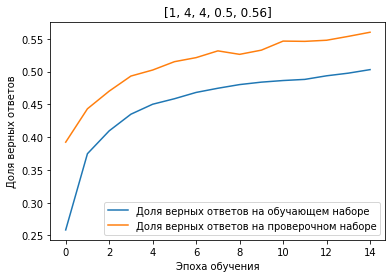

Epoch 1/15
391/391 [==============================] - 3s 9ms/step - loss: 1.9146 - accuracy: 0.3064 - val_loss: 1.5793 - val_accuracy: 0.4416
Epoch 2/15
391/391 [==============================] - 3s 8ms/step - loss: 1.6571 - accuracy: 0.4059 - val_loss: 1.4746 - val_accuracy: 0.4801
Epoch 3/15
391/391 [==============================] - 3s 8ms/step - loss: 1.5814 - accuracy: 0.4316 - val_loss: 1.4267 - val_accuracy: 0.4983
Epoch 4/15
391/391 [==============================] - 3s 8ms/step - loss: 1.5400 - accuracy: 0.4463 - val_loss: 1.4025 - val_accuracy: 0.5032
Epoch 5/15
391/391 [==============================] - 3s 8ms/step - loss: 1.5102 - accuracy: 0.4564 - val_loss: 1.3612 - val_accuracy: 0.5199
Epoch 6/15
391/391 [==============================] - 3s 8ms/step - loss: 1.4882 - accuracy: 0.4650 - val_loss: 1.3400 - val_accuracy: 0.5260
Epoch 7/15
391/391 [==============================] - 3s 8ms/step - loss: 1.4682 - accuracy: 0.4698 - val_loss: 1.3176 - val_accuracy: 0.5332
Epoch 

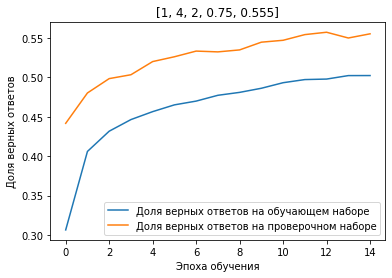

Epoch 1/15
391/391 [==============================] - 4s 9ms/step - loss: 2.3204 - accuracy: 0.1677 - val_loss: 1.9684 - val_accuracy: 0.2915
Epoch 2/15
391/391 [==============================] - 3s 8ms/step - loss: 1.9079 - accuracy: 0.2918 - val_loss: 1.7099 - val_accuracy: 0.3817
Epoch 3/15
391/391 [==============================] - 3s 8ms/step - loss: 1.7857 - accuracy: 0.3427 - val_loss: 1.6203 - val_accuracy: 0.4211
Epoch 4/15
391/391 [==============================] - 3s 8ms/step - loss: 1.7364 - accuracy: 0.3635 - val_loss: 1.5745 - val_accuracy: 0.4343
Epoch 5/15
391/391 [==============================] - 3s 8ms/step - loss: 1.7096 - accuracy: 0.3731 - val_loss: 1.5404 - val_accuracy: 0.4545
Epoch 6/15
391/391 [==============================] - 3s 8ms/step - loss: 1.6899 - accuracy: 0.3830 - val_loss: 1.5247 - val_accuracy: 0.4570
Epoch 7/15
391/391 [==============================] - 3s 8ms/step - loss: 1.6710 - accuracy: 0.3895 - val_loss: 1.5166 - val_accuracy: 0.4573
Epoch 

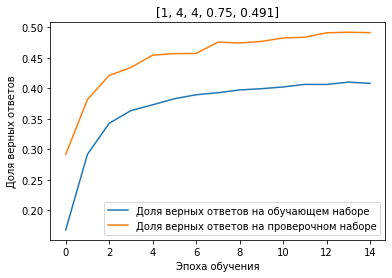

Epoch 1/15
391/391 [==============================] - 4s 11ms/step - loss: 1.4837 - accuracy: 0.4697 - val_loss: 1.2363 - val_accuracy: 0.5562
Epoch 2/15
391/391 [==============================] - 4s 11ms/step - loss: 1.1630 - accuracy: 0.5902 - val_loss: 1.0781 - val_accuracy: 0.6201
Epoch 3/15
391/391 [==============================] - 4s 10ms/step - loss: 1.0331 - accuracy: 0.6354 - val_loss: 1.0461 - val_accuracy: 0.6317
Epoch 4/15
391/391 [==============================] - 4s 11ms/step - loss: 0.9541 - accuracy: 0.6655 - val_loss: 1.0061 - val_accuracy: 0.6495
Epoch 5/15
391/391 [==============================] - 4s 11ms/step - loss: 0.8894 - accuracy: 0.6864 - val_loss: 1.0021 - val_accuracy: 0.6546
Epoch 6/15
391/391 [==============================] - 4s 11ms/step - loss: 0.8493 - accuracy: 0.7016 - val_loss: 0.9448 - val_accuracy: 0.6764
Epoch 7/15
391/391 [==============================] - 4s 10ms/step - loss: 0.8150 - accuracy: 0.7141 - val_loss: 0.9518 - val_accuracy: 0.6692

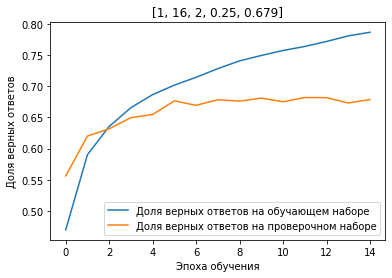

Epoch 1/15
391/391 [==============================] - 4s 11ms/step - loss: 1.5305 - accuracy: 0.4503 - val_loss: 1.2438 - val_accuracy: 0.5647
Epoch 2/15
391/391 [==============================] - 4s 10ms/step - loss: 1.1888 - accuracy: 0.5813 - val_loss: 1.0696 - val_accuracy: 0.6284
Epoch 3/15
391/391 [==============================] - 4s 10ms/step - loss: 1.0835 - accuracy: 0.6202 - val_loss: 0.9962 - val_accuracy: 0.6540
Epoch 4/15
391/391 [==============================] - 4s 10ms/step - loss: 1.0201 - accuracy: 0.6436 - val_loss: 0.9739 - val_accuracy: 0.6654
Epoch 5/15
391/391 [==============================] - 4s 10ms/step - loss: 0.9678 - accuracy: 0.6605 - val_loss: 0.9367 - val_accuracy: 0.6780
Epoch 6/15
391/391 [==============================] - 4s 10ms/step - loss: 0.9311 - accuracy: 0.6758 - val_loss: 0.9319 - val_accuracy: 0.6768
Epoch 7/15
391/391 [==============================] - 4s 10ms/step - loss: 0.8922 - accuracy: 0.6865 - val_loss: 0.8991 - val_accuracy: 0.6875

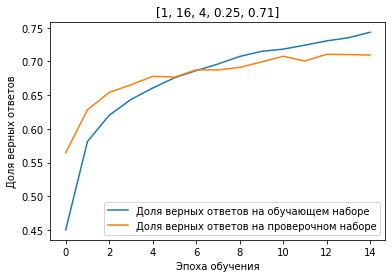

Epoch 1/15
391/391 [==============================] - 4s 11ms/step - loss: 1.5693 - accuracy: 0.4391 - val_loss: 1.2797 - val_accuracy: 0.5427
Epoch 2/15
391/391 [==============================] - 4s 10ms/step - loss: 1.2598 - accuracy: 0.5517 - val_loss: 1.1583 - val_accuracy: 0.5908
Epoch 3/15
391/391 [==============================] - 4s 11ms/step - loss: 1.1439 - accuracy: 0.5965 - val_loss: 1.1015 - val_accuracy: 0.6070
Epoch 4/15
391/391 [==============================] - 4s 10ms/step - loss: 1.0752 - accuracy: 0.6198 - val_loss: 1.0262 - val_accuracy: 0.6407
Epoch 5/15
391/391 [==============================] - 4s 10ms/step - loss: 1.0206 - accuracy: 0.6376 - val_loss: 0.9922 - val_accuracy: 0.6536
Epoch 6/15
391/391 [==============================] - 4s 10ms/step - loss: 0.9785 - accuracy: 0.6541 - val_loss: 0.9736 - val_accuracy: 0.6594
Epoch 7/15
391/391 [==============================] - 4s 10ms/step - loss: 0.9351 - accuracy: 0.6677 - val_loss: 0.9483 - val_accuracy: 0.6678

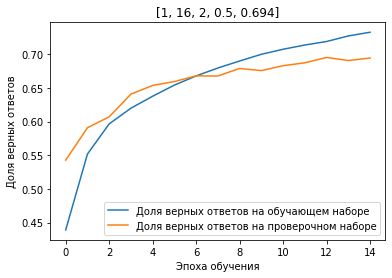

Epoch 1/15
391/391 [==============================] - 4s 11ms/step - loss: 1.6804 - accuracy: 0.3999 - val_loss: 1.3239 - val_accuracy: 0.5236
Epoch 2/15
391/391 [==============================] - 4s 10ms/step - loss: 1.3180 - accuracy: 0.5337 - val_loss: 1.1395 - val_accuracy: 0.5964
Epoch 3/15
391/391 [==============================] - 4s 10ms/step - loss: 1.2149 - accuracy: 0.5723 - val_loss: 1.0687 - val_accuracy: 0.6213
Epoch 4/15
391/391 [==============================] - 4s 10ms/step - loss: 1.1547 - accuracy: 0.5930 - val_loss: 1.0188 - val_accuracy: 0.6433
Epoch 5/15
391/391 [==============================] - 4s 10ms/step - loss: 1.1018 - accuracy: 0.6144 - val_loss: 0.9816 - val_accuracy: 0.6541
Epoch 6/15
391/391 [==============================] - 4s 10ms/step - loss: 1.0699 - accuracy: 0.6249 - val_loss: 0.9602 - val_accuracy: 0.6614
Epoch 7/15
391/391 [==============================] - 4s 10ms/step - loss: 1.0407 - accuracy: 0.6342 - val_loss: 0.9226 - val_accuracy: 0.6739

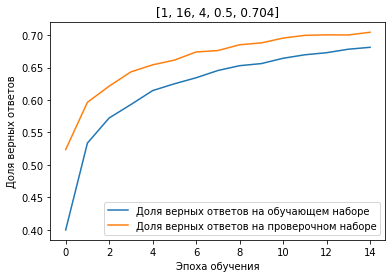

Epoch 1/15
391/391 [==============================] - 5s 12ms/step - loss: 1.6203 - accuracy: 0.4124 - val_loss: 1.2730 - val_accuracy: 0.5535
Epoch 2/15
391/391 [==============================] - 4s 11ms/step - loss: 1.3188 - accuracy: 0.5279 - val_loss: 1.1170 - val_accuracy: 0.6117
Epoch 3/15
391/391 [==============================] - 4s 11ms/step - loss: 1.2132 - accuracy: 0.5661 - val_loss: 1.0473 - val_accuracy: 0.6360
Epoch 4/15
391/391 [==============================] - 4s 10ms/step - loss: 1.1461 - accuracy: 0.5927 - val_loss: 1.0396 - val_accuracy: 0.6352
Epoch 5/15
391/391 [==============================] - 4s 10ms/step - loss: 1.1059 - accuracy: 0.6079 - val_loss: 1.0043 - val_accuracy: 0.6506
Epoch 6/15
391/391 [==============================] - 4s 10ms/step - loss: 1.0796 - accuracy: 0.6169 - val_loss: 0.9535 - val_accuracy: 0.6713
Epoch 7/15
391/391 [==============================] - 4s 10ms/step - loss: 1.0432 - accuracy: 0.6292 - val_loss: 0.9362 - val_accuracy: 0.6721

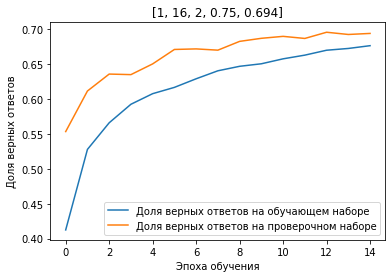

Epoch 1/15
391/391 [==============================] - 4s 11ms/step - loss: 1.7638 - accuracy: 0.3602 - val_loss: 1.4038 - val_accuracy: 0.4943
Epoch 2/15
391/391 [==============================] - 4s 10ms/step - loss: 1.4807 - accuracy: 0.4697 - val_loss: 1.2724 - val_accuracy: 0.5591
Epoch 3/15
391/391 [==============================] - 4s 10ms/step - loss: 1.3904 - accuracy: 0.5036 - val_loss: 1.1865 - val_accuracy: 0.5795
Epoch 4/15
391/391 [==============================] - 4s 10ms/step - loss: 1.3382 - accuracy: 0.5228 - val_loss: 1.1303 - val_accuracy: 0.6190
Epoch 5/15
391/391 [==============================] - 4s 10ms/step - loss: 1.3016 - accuracy: 0.5378 - val_loss: 1.0936 - val_accuracy: 0.6192
Epoch 6/15
391/391 [==============================] - 4s 10ms/step - loss: 1.2691 - accuracy: 0.5494 - val_loss: 1.0712 - val_accuracy: 0.6296
Epoch 7/15
391/391 [==============================] - 4s 10ms/step - loss: 1.2492 - accuracy: 0.5554 - val_loss: 1.0398 - val_accuracy: 0.6370

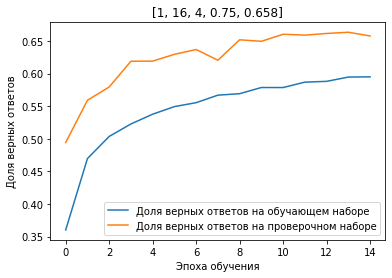

In [ ]:
# Эксперементируем на двух сверточных слоях при разных модификациях других параметрах архитектуры
F = [2, 4, 16]  # Кол-во нейронов(фильтров) в сверточных слоях
D = [0.25, 0.5, 0.75]  # Dropout
M = [2, 4]  # параметр pool_size, MaxPooling2D
for f_ in F:
    flag = True
    for d_ in D:
        flag = True
        for m_ in M:
            flag = True
            #Создаем последовательную модель
            model = Sequential()
            model.add(BatchNormalization(input_shape=(32, 32, 3)))
            #Первый сверточный слой
            model.add(Conv2D(f_, (3, 3), padding='same', activation='relu'))
            #Второй сверточный слой
            model.add(Conv2D(f_, (3, 3), padding='same', activation='relu'))
            #Первый слой подвыборки
            model.add(MaxPooling2D(pool_size=(m_, m_)))
            #Слой регуляризации Dropout
            model.add(Dropout(d_))


            #Слой преобразования данных из 2D представления в плоское
            model.add(Flatten())
            #Полносвязный слой для классификации
            model.add(Dense(64, activation='relu'))
            #Выходной полносвязный слой
            model.add(Dense(10, activation='softmax'))

            # Компилируем сеть
            model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

            # Обучаем сеть на данных mnist
            history = model.fit(x_train10,
                                y_train10,
                                batch_size=128,
                                epochs=15,
                                validation_data=(x_test10, y_test10),
                                verbose=1)
           
            
            data = data + [[1, f_, m_, d_, round(model.evaluate(x_test10, y_test10, verbose=0)[1], 3)]]
            #Отображаем график точности обучения
            plt.plot(history.history['accuracy'], 
            label='Доля верных ответов на обучающем наборе')
            plt.plot(history.history['val_accuracy'], 
            label='Доля верных ответов на проверочном наборе')
            plt.xlabel('Эпоха обучения')
            plt.ylabel('Доля верных ответов')
            plt.title(data[-1])
            plt.legend()
            plt.show()
            if ( m_ == 4 ): flag = False 
            
        if (flag == True): 
            data = data + [[1, f_, m_, d_, round(model.evaluate(x_test10, y_test10, verbose=0)[1], 3)]]
            #Отображаем график точности обучения
            plt.plot(history.history['accuracy'], 
            label='Доля верных ответов на обучающем наборе')
            plt.plot(history.history['val_accuracy'], 
            label='Доля верных ответов на проверочном наборе')
            plt.xlabel('Эпоха обучения')
            plt.ylabel('Доля верных ответов')
            plt.title(data[-1])
            plt.legend()
            plt.show()
        if (d_ == 0.75): flag = False
       
    if (flag == True): 
            data = data + [[1, f_, m_, d_, round(model.evaluate(x_test10, y_test10, verbose=0)[1], 3)]]
            #Отображаем график точности обучения
            plt.plot(history.history['accuracy'], 
            label='Доля верных ответов на обучающем наборе')
            plt.plot(history.history['val_accuracy'], 
            label='Доля верных ответов на проверочном наборе')
            plt.xlabel('Эпоха обучения')
            plt.ylabel('Доля верных ответов')
            plt.title(data[-1])
            plt.legend()
            plt.show()


Epoch 1/15
391/391 [==============================] - 3s 6ms/step - loss: 1.9462 - accuracy: 0.3114 - val_loss: 1.7396 - val_accuracy: 0.3854
Epoch 2/15
391/391 [==============================] - 2s 6ms/step - loss: 1.7203 - accuracy: 0.3901 - val_loss: 1.6361 - val_accuracy: 0.4198
Epoch 3/15
391/391 [==============================] - 3s 7ms/step - loss: 1.6410 - accuracy: 0.4189 - val_loss: 1.5680 - val_accuracy: 0.4374
Epoch 4/15
391/391 [==============================] - 3s 7ms/step - loss: 1.5877 - accuracy: 0.4363 - val_loss: 1.5300 - val_accuracy: 0.4546
Epoch 5/15
391/391 [==============================] - 3s 7ms/step - loss: 1.5490 - accuracy: 0.4485 - val_loss: 1.5128 - val_accuracy: 0.4533
Epoch 6/15
391/391 [==============================] - 3s 7ms/step - loss: 1.5212 - accuracy: 0.4585 - val_loss: 1.5043 - val_accuracy: 0.4629
Epoch 7/15
391/391 [==============================] - 3s 7ms/step - loss: 1.5013 - accuracy: 0.4667 - val_loss: 1.4743 - val_accuracy: 0.4650
Epoch 

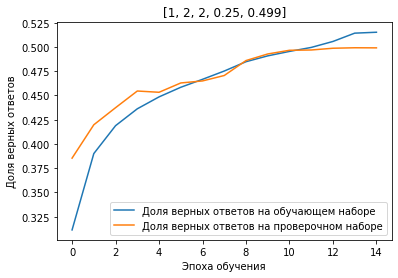

Epoch 1/15
391/391 [==============================] - 3s 7ms/step - loss: 2.0808 - accuracy: 0.2528 - val_loss: 1.8239 - val_accuracy: 0.3510
Epoch 2/15
391/391 [==============================] - 3s 7ms/step - loss: 1.8023 - accuracy: 0.3604 - val_loss: 1.6908 - val_accuracy: 0.4090
Epoch 3/15
391/391 [==============================] - 3s 7ms/step - loss: 1.7221 - accuracy: 0.3883 - val_loss: 1.6417 - val_accuracy: 0.4181
Epoch 4/15
391/391 [==============================] - 3s 7ms/step - loss: 1.6825 - accuracy: 0.3996 - val_loss: 1.6000 - val_accuracy: 0.4371
Epoch 5/15
391/391 [==============================] - 3s 7ms/step - loss: 1.6578 - accuracy: 0.4086 - val_loss: 1.5822 - val_accuracy: 0.4440
Epoch 6/15
391/391 [==============================] - 3s 7ms/step - loss: 1.6377 - accuracy: 0.4195 - val_loss: 1.5606 - val_accuracy: 0.4461
Epoch 7/15
391/391 [==============================] - 3s 7ms/step - loss: 1.6182 - accuracy: 0.4262 - val_loss: 1.5415 - val_accuracy: 0.4630
Epoch 

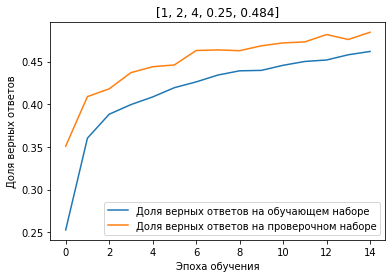

Epoch 1/15
391/391 [==============================] - 3s 7ms/step - loss: 2.0212 - accuracy: 0.2736 - val_loss: 1.7301 - val_accuracy: 0.3909
Epoch 2/15
391/391 [==============================] - 3s 7ms/step - loss: 1.7420 - accuracy: 0.3731 - val_loss: 1.6080 - val_accuracy: 0.4194
Epoch 3/15
391/391 [==============================] - 3s 7ms/step - loss: 1.6579 - accuracy: 0.3992 - val_loss: 1.5400 - val_accuracy: 0.4436
Epoch 4/15
391/391 [==============================] - 3s 7ms/step - loss: 1.6072 - accuracy: 0.4164 - val_loss: 1.5014 - val_accuracy: 0.4566
Epoch 5/15
391/391 [==============================] - 3s 7ms/step - loss: 1.5758 - accuracy: 0.4301 - val_loss: 1.4690 - val_accuracy: 0.4682
Epoch 6/15
391/391 [==============================] - 3s 7ms/step - loss: 1.5446 - accuracy: 0.4413 - val_loss: 1.4441 - val_accuracy: 0.4780
Epoch 7/15
391/391 [==============================] - 3s 7ms/step - loss: 1.5249 - accuracy: 0.4519 - val_loss: 1.4386 - val_accuracy: 0.4810
Epoch 

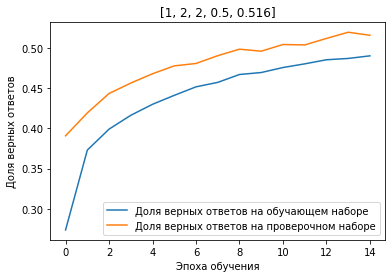

Epoch 1/15
391/391 [==============================] - 3s 7ms/step - loss: 2.0568 - accuracy: 0.2498 - val_loss: 1.8024 - val_accuracy: 0.3578
Epoch 2/15
391/391 [==============================] - 3s 7ms/step - loss: 1.8453 - accuracy: 0.3368 - val_loss: 1.7257 - val_accuracy: 0.3893
Epoch 3/15
391/391 [==============================] - 3s 7ms/step - loss: 1.7928 - accuracy: 0.3518 - val_loss: 1.6851 - val_accuracy: 0.3981
Epoch 4/15
391/391 [==============================] - 3s 7ms/step - loss: 1.7630 - accuracy: 0.3610 - val_loss: 1.6453 - val_accuracy: 0.4078
Epoch 5/15
391/391 [==============================] - 3s 7ms/step - loss: 1.7453 - accuracy: 0.3665 - val_loss: 1.6285 - val_accuracy: 0.4166
Epoch 6/15
391/391 [==============================] - 3s 7ms/step - loss: 1.7247 - accuracy: 0.3740 - val_loss: 1.6180 - val_accuracy: 0.4203
Epoch 7/15
391/391 [==============================] - 3s 7ms/step - loss: 1.7094 - accuracy: 0.3792 - val_loss: 1.6052 - val_accuracy: 0.4266
Epoch 

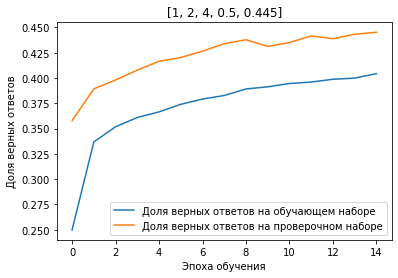

Epoch 1/15
391/391 [==============================] - 3s 7ms/step - loss: 2.1626 - accuracy: 0.2081 - val_loss: 1.8607 - val_accuracy: 0.3452
Epoch 2/15
391/391 [==============================] - 3s 7ms/step - loss: 1.8778 - accuracy: 0.3142 - val_loss: 1.7404 - val_accuracy: 0.3788
Epoch 3/15
391/391 [==============================] - 3s 7ms/step - loss: 1.8077 - accuracy: 0.3376 - val_loss: 1.6806 - val_accuracy: 0.3992
Epoch 4/15
391/391 [==============================] - 3s 7ms/step - loss: 1.7762 - accuracy: 0.3506 - val_loss: 1.6622 - val_accuracy: 0.3995
Epoch 5/15
391/391 [==============================] - 3s 7ms/step - loss: 1.7496 - accuracy: 0.3612 - val_loss: 1.6265 - val_accuracy: 0.4208
Epoch 6/15
391/391 [==============================] - 3s 7ms/step - loss: 1.7341 - accuracy: 0.3683 - val_loss: 1.6140 - val_accuracy: 0.4250
Epoch 7/15
391/391 [==============================] - 3s 7ms/step - loss: 1.7179 - accuracy: 0.3711 - val_loss: 1.6192 - val_accuracy: 0.4238
Epoch 

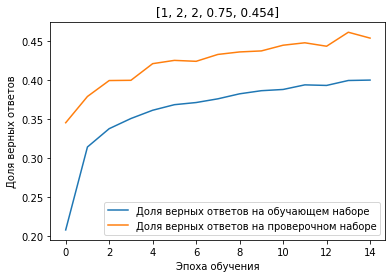

Epoch 1/15
391/391 [==============================] - 3s 7ms/step - loss: 2.3296 - accuracy: 0.1706 - val_loss: 1.9779 - val_accuracy: 0.2852
Epoch 2/15
391/391 [==============================] - 3s 7ms/step - loss: 1.9867 - accuracy: 0.2618 - val_loss: 1.8312 - val_accuracy: 0.3381
Epoch 3/15
391/391 [==============================] - 3s 7ms/step - loss: 1.9240 - accuracy: 0.2899 - val_loss: 1.7794 - val_accuracy: 0.3679
Epoch 4/15
391/391 [==============================] - 3s 7ms/step - loss: 1.9020 - accuracy: 0.3016 - val_loss: 1.7584 - val_accuracy: 0.3785
Epoch 5/15
391/391 [==============================] - 3s 7ms/step - loss: 1.8848 - accuracy: 0.3086 - val_loss: 1.7537 - val_accuracy: 0.3763
Epoch 6/15
391/391 [==============================] - 3s 7ms/step - loss: 1.8736 - accuracy: 0.3116 - val_loss: 1.7288 - val_accuracy: 0.3866
Epoch 7/15
391/391 [==============================] - 3s 7ms/step - loss: 1.8618 - accuracy: 0.3161 - val_loss: 1.7233 - val_accuracy: 0.3891
Epoch 

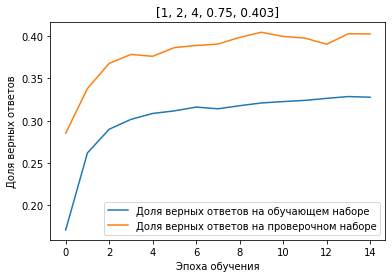

Epoch 1/15
391/391 [==============================] - 3s 8ms/step - loss: 1.7483 - accuracy: 0.3718 - val_loss: 1.5052 - val_accuracy: 0.4648
Epoch 2/15
391/391 [==============================] - 3s 7ms/step - loss: 1.4768 - accuracy: 0.4753 - val_loss: 1.3810 - val_accuracy: 0.5097
Epoch 3/15
391/391 [==============================] - 3s 7ms/step - loss: 1.3806 - accuracy: 0.5101 - val_loss: 1.3169 - val_accuracy: 0.5337
Epoch 4/15
391/391 [==============================] - 3s 7ms/step - loss: 1.3185 - accuracy: 0.5331 - val_loss: 1.2806 - val_accuracy: 0.5447
Epoch 5/15
391/391 [==============================] - 3s 7ms/step - loss: 1.2780 - accuracy: 0.5494 - val_loss: 1.2615 - val_accuracy: 0.5524
Epoch 6/15
391/391 [==============================] - 3s 7ms/step - loss: 1.2371 - accuracy: 0.5630 - val_loss: 1.2518 - val_accuracy: 0.5562
Epoch 7/15
391/391 [==============================] - 3s 7ms/step - loss: 1.2102 - accuracy: 0.5722 - val_loss: 1.2270 - val_accuracy: 0.5661
Epoch 

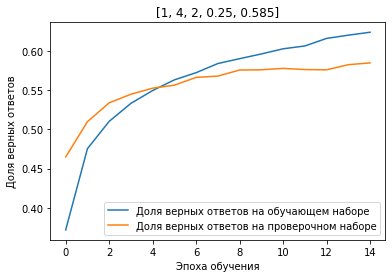

Epoch 1/15
391/391 [==============================] - 3s 7ms/step - loss: 1.9223 - accuracy: 0.3068 - val_loss: 1.6136 - val_accuracy: 0.4258
Epoch 2/15
391/391 [==============================] - 3s 7ms/step - loss: 1.6131 - accuracy: 0.4241 - val_loss: 1.4728 - val_accuracy: 0.4780
Epoch 3/15
391/391 [==============================] - 3s 7ms/step - loss: 1.5238 - accuracy: 0.4578 - val_loss: 1.4158 - val_accuracy: 0.5039
Epoch 4/15
391/391 [==============================] - 3s 7ms/step - loss: 1.4685 - accuracy: 0.4807 - val_loss: 1.3648 - val_accuracy: 0.5223
Epoch 5/15
391/391 [==============================] - 3s 7ms/step - loss: 1.4302 - accuracy: 0.4927 - val_loss: 1.3357 - val_accuracy: 0.5332
Epoch 6/15
391/391 [==============================] - 3s 7ms/step - loss: 1.3976 - accuracy: 0.5052 - val_loss: 1.3036 - val_accuracy: 0.5440
Epoch 7/15
391/391 [==============================] - 3s 7ms/step - loss: 1.3763 - accuracy: 0.5123 - val_loss: 1.2731 - val_accuracy: 0.5575
Epoch 

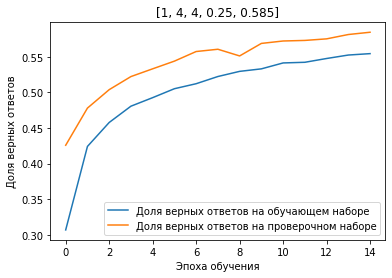

Epoch 1/15
391/391 [==============================] - 3s 8ms/step - loss: 1.9021 - accuracy: 0.3178 - val_loss: 1.5895 - val_accuracy: 0.4297
Epoch 2/15
391/391 [==============================] - 3s 7ms/step - loss: 1.6173 - accuracy: 0.4233 - val_loss: 1.4880 - val_accuracy: 0.4667
Epoch 3/15
391/391 [==============================] - 3s 7ms/step - loss: 1.5414 - accuracy: 0.4528 - val_loss: 1.4187 - val_accuracy: 0.4964
Epoch 4/15
391/391 [==============================] - 3s 7ms/step - loss: 1.4872 - accuracy: 0.4686 - val_loss: 1.3759 - val_accuracy: 0.5081
Epoch 5/15
391/391 [==============================] - 3s 7ms/step - loss: 1.4414 - accuracy: 0.4868 - val_loss: 1.3454 - val_accuracy: 0.5216
Epoch 6/15
391/391 [==============================] - 3s 7ms/step - loss: 1.4174 - accuracy: 0.4947 - val_loss: 1.3255 - val_accuracy: 0.5241
Epoch 7/15
391/391 [==============================] - 3s 7ms/step - loss: 1.3899 - accuracy: 0.5034 - val_loss: 1.3084 - val_accuracy: 0.5322
Epoch 

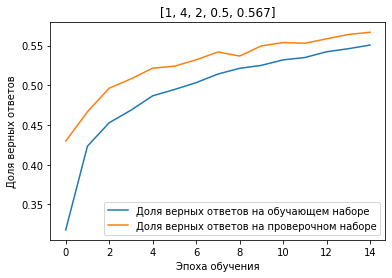

Epoch 1/15
391/391 [==============================] - 3s 8ms/step - loss: 1.9928 - accuracy: 0.2824 - val_loss: 1.6706 - val_accuracy: 0.4143
Epoch 2/15
391/391 [==============================] - 3s 7ms/step - loss: 1.7331 - accuracy: 0.3764 - val_loss: 1.5653 - val_accuracy: 0.4522
Epoch 3/15
391/391 [==============================] - 3s 7ms/step - loss: 1.6648 - accuracy: 0.4068 - val_loss: 1.5100 - val_accuracy: 0.4737
Epoch 4/15
391/391 [==============================] - 3s 7ms/step - loss: 1.6202 - accuracy: 0.4244 - val_loss: 1.4825 - val_accuracy: 0.4869
Epoch 5/15
391/391 [==============================] - 3s 7ms/step - loss: 1.5887 - accuracy: 0.4348 - val_loss: 1.4367 - val_accuracy: 0.4969
Epoch 6/15
391/391 [==============================] - 3s 7ms/step - loss: 1.5682 - accuracy: 0.4435 - val_loss: 1.4242 - val_accuracy: 0.4957
Epoch 7/15
391/391 [==============================] - 3s 7ms/step - loss: 1.5479 - accuracy: 0.4518 - val_loss: 1.4224 - val_accuracy: 0.4981
Epoch 

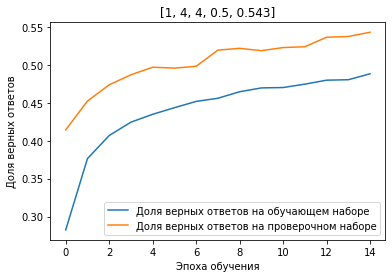

Epoch 1/15
391/391 [==============================] - 3s 8ms/step - loss: 1.9723 - accuracy: 0.2916 - val_loss: 1.6649 - val_accuracy: 0.4064
Epoch 2/15
391/391 [==============================] - 3s 7ms/step - loss: 1.7278 - accuracy: 0.3822 - val_loss: 1.5623 - val_accuracy: 0.4521
Epoch 3/15
391/391 [==============================] - 3s 7ms/step - loss: 1.6543 - accuracy: 0.4083 - val_loss: 1.5002 - val_accuracy: 0.4741
Epoch 4/15
391/391 [==============================] - 3s 7ms/step - loss: 1.6154 - accuracy: 0.4210 - val_loss: 1.4626 - val_accuracy: 0.4898
Epoch 5/15
391/391 [==============================] - 3s 7ms/step - loss: 1.5804 - accuracy: 0.4335 - val_loss: 1.4552 - val_accuracy: 0.4798
Epoch 6/15
391/391 [==============================] - 3s 7ms/step - loss: 1.5593 - accuracy: 0.4410 - val_loss: 1.4297 - val_accuracy: 0.4861
Epoch 7/15
391/391 [==============================] - 3s 7ms/step - loss: 1.5472 - accuracy: 0.4482 - val_loss: 1.4163 - val_accuracy: 0.4950
Epoch 

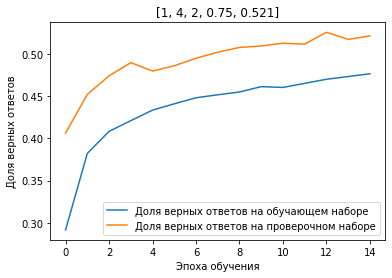

Epoch 1/15
391/391 [==============================] - 3s 7ms/step - loss: 2.1949 - accuracy: 0.2035 - val_loss: 1.8410 - val_accuracy: 0.3621
Epoch 2/15
391/391 [==============================] - 3s 7ms/step - loss: 1.8820 - accuracy: 0.3097 - val_loss: 1.6824 - val_accuracy: 0.4184
Epoch 3/15
391/391 [==============================] - 3s 7ms/step - loss: 1.8044 - accuracy: 0.3454 - val_loss: 1.6310 - val_accuracy: 0.4336
Epoch 4/15
391/391 [==============================] - 3s 7ms/step - loss: 1.7698 - accuracy: 0.3626 - val_loss: 1.5724 - val_accuracy: 0.4452
Epoch 5/15
391/391 [==============================] - 3s 7ms/step - loss: 1.7465 - accuracy: 0.3704 - val_loss: 1.5725 - val_accuracy: 0.4518
Epoch 6/15
391/391 [==============================] - 3s 7ms/step - loss: 1.7243 - accuracy: 0.3775 - val_loss: 1.5448 - val_accuracy: 0.4534
Epoch 7/15
391/391 [==============================] - 3s 7ms/step - loss: 1.7120 - accuracy: 0.3822 - val_loss: 1.5263 - val_accuracy: 0.4698
Epoch 

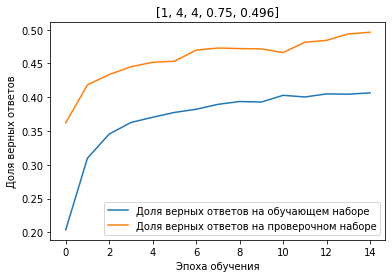

Epoch 1/15
391/391 [==============================] - 3s 9ms/step - loss: 1.5248 - accuracy: 0.4620 - val_loss: 1.2622 - val_accuracy: 0.5613
Epoch 2/15
391/391 [==============================] - 3s 8ms/step - loss: 1.2077 - accuracy: 0.5737 - val_loss: 1.2028 - val_accuracy: 0.5767
Epoch 3/15
391/391 [==============================] - 3s 8ms/step - loss: 1.1123 - accuracy: 0.6127 - val_loss: 1.0860 - val_accuracy: 0.6170
Epoch 4/15
391/391 [==============================] - 3s 8ms/step - loss: 1.0506 - accuracy: 0.6331 - val_loss: 1.0669 - val_accuracy: 0.6278
Epoch 5/15
391/391 [==============================] - 3s 8ms/step - loss: 1.0013 - accuracy: 0.6505 - val_loss: 1.0386 - val_accuracy: 0.6416
Epoch 6/15
391/391 [==============================] - 3s 8ms/step - loss: 0.9698 - accuracy: 0.6616 - val_loss: 1.0539 - val_accuracy: 0.6371
Epoch 7/15
391/391 [==============================] - 3s 8ms/step - loss: 0.9466 - accuracy: 0.6701 - val_loss: 1.0064 - val_accuracy: 0.6541
Epoch 

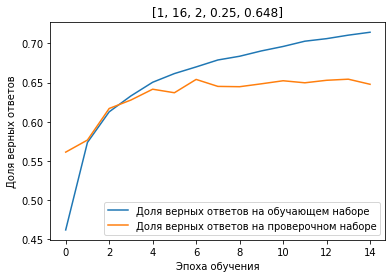

Epoch 1/15
391/391 [==============================] - 3s 9ms/step - loss: 1.6027 - accuracy: 0.4285 - val_loss: 1.3072 - val_accuracy: 0.5449
Epoch 2/15
391/391 [==============================] - 3s 8ms/step - loss: 1.3087 - accuracy: 0.5384 - val_loss: 1.1958 - val_accuracy: 0.5828
Epoch 3/15
391/391 [==============================] - 3s 8ms/step - loss: 1.2182 - accuracy: 0.5747 - val_loss: 1.1308 - val_accuracy: 0.6044
Epoch 4/15
391/391 [==============================] - 3s 8ms/step - loss: 1.1601 - accuracy: 0.5955 - val_loss: 1.0667 - val_accuracy: 0.6262
Epoch 5/15
391/391 [==============================] - 3s 8ms/step - loss: 1.1186 - accuracy: 0.6095 - val_loss: 1.0400 - val_accuracy: 0.6384
Epoch 6/15
391/391 [==============================] - 3s 8ms/step - loss: 1.0801 - accuracy: 0.6237 - val_loss: 1.0408 - val_accuracy: 0.6362
Epoch 7/15
391/391 [==============================] - 3s 8ms/step - loss: 1.0528 - accuracy: 0.6303 - val_loss: 1.0031 - val_accuracy: 0.6499
Epoch 

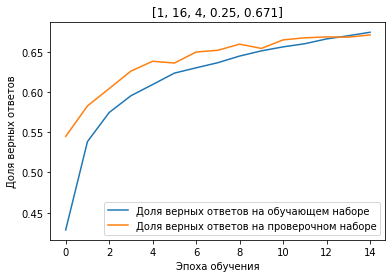

Epoch 1/15
391/391 [==============================] - 3s 9ms/step - loss: 1.5882 - accuracy: 0.4295 - val_loss: 1.3120 - val_accuracy: 0.5341
Epoch 2/15
391/391 [==============================] - 3s 8ms/step - loss: 1.3272 - accuracy: 0.5322 - val_loss: 1.2118 - val_accuracy: 0.5749
Epoch 3/15
391/391 [==============================] - 3s 8ms/step - loss: 1.2369 - accuracy: 0.5646 - val_loss: 1.1446 - val_accuracy: 0.6014
Epoch 4/15
391/391 [==============================] - 3s 8ms/step - loss: 1.1910 - accuracy: 0.5851 - val_loss: 1.1211 - val_accuracy: 0.6090
Epoch 5/15
391/391 [==============================] - 3s 8ms/step - loss: 1.1478 - accuracy: 0.6007 - val_loss: 1.1248 - val_accuracy: 0.6111
Epoch 6/15
391/391 [==============================] - 3s 8ms/step - loss: 1.1245 - accuracy: 0.6082 - val_loss: 1.0873 - val_accuracy: 0.6260
Epoch 7/15
391/391 [==============================] - 3s 8ms/step - loss: 1.0971 - accuracy: 0.6180 - val_loss: 1.0668 - val_accuracy: 0.6296
Epoch 

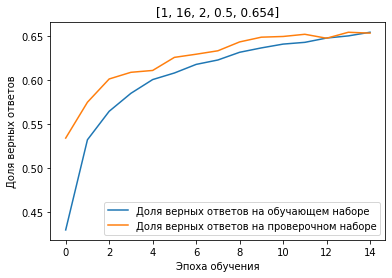

Epoch 1/15
391/391 [==============================] - 3s 8ms/step - loss: 1.7167 - accuracy: 0.3831 - val_loss: 1.4041 - val_accuracy: 0.5016
Epoch 2/15
391/391 [==============================] - 3s 8ms/step - loss: 1.4376 - accuracy: 0.4913 - val_loss: 1.2735 - val_accuracy: 0.5522
Epoch 3/15
391/391 [==============================] - 3s 8ms/step - loss: 1.3540 - accuracy: 0.5255 - val_loss: 1.2014 - val_accuracy: 0.5884
Epoch 4/15
391/391 [==============================] - 3s 8ms/step - loss: 1.2935 - accuracy: 0.5509 - val_loss: 1.1715 - val_accuracy: 0.5936
Epoch 5/15
391/391 [==============================] - 3s 8ms/step - loss: 1.2526 - accuracy: 0.5652 - val_loss: 1.1277 - val_accuracy: 0.6083
Epoch 6/15
391/391 [==============================] - 3s 8ms/step - loss: 1.2177 - accuracy: 0.5755 - val_loss: 1.1054 - val_accuracy: 0.6205
Epoch 7/15
391/391 [==============================] - 3s 8ms/step - loss: 1.1950 - accuracy: 0.5847 - val_loss: 1.0752 - val_accuracy: 0.6297
Epoch 

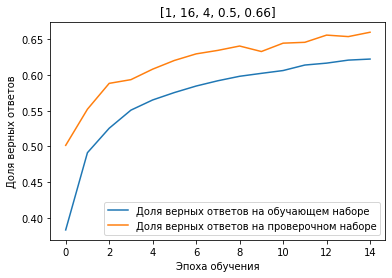

Epoch 1/15
391/391 [==============================] - 3s 8ms/step - loss: 1.6974 - accuracy: 0.3889 - val_loss: 1.3679 - val_accuracy: 0.5215
Epoch 2/15
391/391 [==============================] - 3s 8ms/step - loss: 1.4333 - accuracy: 0.4871 - val_loss: 1.2662 - val_accuracy: 0.5613
Epoch 3/15
391/391 [==============================] - 3s 8ms/step - loss: 1.3434 - accuracy: 0.5238 - val_loss: 1.2090 - val_accuracy: 0.5712
Epoch 4/15
391/391 [==============================] - 3s 8ms/step - loss: 1.2888 - accuracy: 0.5429 - val_loss: 1.1528 - val_accuracy: 0.5955
Epoch 5/15
391/391 [==============================] - 3s 8ms/step - loss: 1.2556 - accuracy: 0.5590 - val_loss: 1.1461 - val_accuracy: 0.5971
Epoch 6/15
391/391 [==============================] - 3s 8ms/step - loss: 1.2247 - accuracy: 0.5654 - val_loss: 1.0986 - val_accuracy: 0.6172
Epoch 7/15
391/391 [==============================] - 3s 8ms/step - loss: 1.1972 - accuracy: 0.5778 - val_loss: 1.0884 - val_accuracy: 0.6192
Epoch 

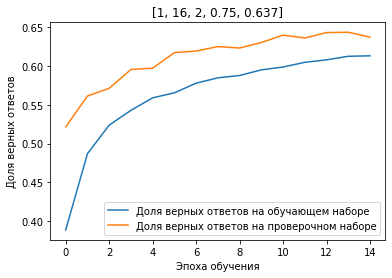

Epoch 1/15
391/391 [==============================] - 3s 8ms/step - loss: 1.8706 - accuracy: 0.3163 - val_loss: 1.4955 - val_accuracy: 0.4777
Epoch 2/15
391/391 [==============================] - 3s 8ms/step - loss: 1.5933 - accuracy: 0.4293 - val_loss: 1.4022 - val_accuracy: 0.5149
Epoch 3/15
391/391 [==============================] - 3s 8ms/step - loss: 1.5232 - accuracy: 0.4567 - val_loss: 1.3514 - val_accuracy: 0.5353
Epoch 4/15
391/391 [==============================] - 3s 8ms/step - loss: 1.4785 - accuracy: 0.4737 - val_loss: 1.3042 - val_accuracy: 0.5477
Epoch 5/15
391/391 [==============================] - 3s 8ms/step - loss: 1.4509 - accuracy: 0.4886 - val_loss: 1.2800 - val_accuracy: 0.5542
Epoch 6/15
391/391 [==============================] - 3s 8ms/step - loss: 1.4199 - accuracy: 0.4947 - val_loss: 1.2432 - val_accuracy: 0.5750
Epoch 7/15
391/391 [==============================] - 3s 8ms/step - loss: 1.3964 - accuracy: 0.5033 - val_loss: 1.2405 - val_accuracy: 0.5757
Epoch 

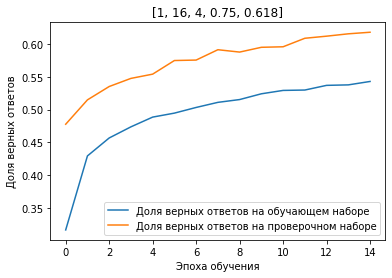

In [ ]:
# Эксперементируем на одном сверточном слое при разных модификациях других параметрах архитектуры
F = [2, 4, 16]  # Кол-во нейронов(фильтров) в сверточных слоях
D = [0.25, 0.5, 0.75]  # Dropout
M = [2, 4]  # параметр pool_size, MaxPooling2D
for f_ in F:
    flag = True
    for d_ in D:
        flag = True
        for m_ in M:
            flag = True
            # Создаем последовательную модель
            model = Sequential()
            model.add(BatchNormalization(input_shape=(32, 32, 3)))
            # Первый сверточный слой
            model.add(Conv2D(f_, (3, 3), padding='same', activation='relu'))
            # Первый слой подвыборки
            model.add(MaxPooling2D(pool_size=(m_, m_)))
            # Слой регуляризации Dropout
            model.add(Dropout(d_))

            # Слой преобразования данных из 2D представления в плоское
            model.add(Flatten())
            # Полносвязный слой для классификации
            model.add(Dense(64, activation='relu'))
            # Выходной полносвязный слой
            model.add(Dense(10, activation='softmax'))

            # Компилируем сеть
            model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

            # Обучаем сеть на данных mnist
            history = model.fit(x_train10,
                                y_train10,
                                batch_size=128,
                                epochs=15,
                                validation_data=(x_test10, y_test10),
                                verbose=1)

            data = data + [[1, f_, m_, d_, round(model.evaluate(x_test10, y_test10, verbose=0)[1], 3)]]
            plt.plot(history.history['accuracy'], 
            label='Доля верных ответов на обучающем наборе')
            plt.plot(history.history['val_accuracy'], 
            label='Доля верных ответов на проверочном наборе')
            plt.xlabel('Эпоха обучения')
            plt.ylabel('Доля верных ответов')
            plt.title(data[-1])
            plt.legend()
            plt.show()
            if (m_ == 4): flag = False

        if (flag == True): 
            data = data + [[1, f_, m_, d_, round(model.evaluate(x_test10, y_test10, verbose=0)[1], 3)]]
            plt.plot(history.history['accuracy'], 
            label='Доля верных ответов на обучающем наборе')
            plt.plot(history.history['val_accuracy'], 
            label='Доля верных ответов на проверочном наборе')
            plt.xlabel('Эпоха обучения')
            plt.ylabel('Доля верных ответов')
            plt.title(data[-1])
            plt.legend()
            plt.show()

        if (d_ == 0.75): flag = False

    if (flag == True): 
         data = data + [[1, f_, m_, d_, round(model.evaluate(x_test10, y_test10, verbose=0)[1], 3)]]
         plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
         plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
         plt.xlabel('Эпоха обучения')
         plt.ylabel('Доля верных ответов')
         plt.title(data[-1])
         plt.legend()
         plt.show()
  

Epoch 1/15
391/391 [==============================] - 3s 7ms/step - loss: 1.8760 - accuracy: 0.3237 - val_loss: 1.6842 - val_accuracy: 0.3975
Epoch 2/15
391/391 [==============================] - 3s 7ms/step - loss: 1.6433 - accuracy: 0.4138 - val_loss: 1.5973 - val_accuracy: 0.4218
Epoch 3/15
391/391 [==============================] - 3s 7ms/step - loss: 1.5501 - accuracy: 0.4483 - val_loss: 1.5501 - val_accuracy: 0.4438
Epoch 4/15
391/391 [==============================] - 3s 7ms/step - loss: 1.4927 - accuracy: 0.4667 - val_loss: 1.5106 - val_accuracy: 0.4542
Epoch 5/15
391/391 [==============================] - 3s 7ms/step - loss: 1.4373 - accuracy: 0.4892 - val_loss: 1.4879 - val_accuracy: 0.4677
Epoch 6/15
391/391 [==============================] - 3s 8ms/step - loss: 1.3898 - accuracy: 0.5054 - val_loss: 1.4827 - val_accuracy: 0.4670
Epoch 7/15
391/391 [==============================] - 3s 7ms/step - loss: 1.3506 - accuracy: 0.5194 - val_loss: 1.4650 - val_accuracy: 0.4743
Epoch 

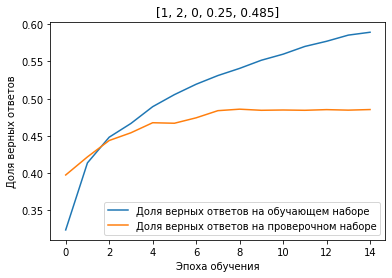

Epoch 1/15
391/391 [==============================] - 3s 7ms/step - loss: 1.8876 - accuracy: 0.3277 - val_loss: 1.6644 - val_accuracy: 0.4063
Epoch 2/15
391/391 [==============================] - 3s 7ms/step - loss: 1.6717 - accuracy: 0.4049 - val_loss: 1.5723 - val_accuracy: 0.4379
Epoch 3/15
391/391 [==============================] - 3s 7ms/step - loss: 1.5894 - accuracy: 0.4311 - val_loss: 1.5187 - val_accuracy: 0.4555
Epoch 4/15
391/391 [==============================] - 3s 7ms/step - loss: 1.5307 - accuracy: 0.4473 - val_loss: 1.4839 - val_accuracy: 0.4656
Epoch 5/15
391/391 [==============================] - 3s 7ms/step - loss: 1.4894 - accuracy: 0.4644 - val_loss: 1.4612 - val_accuracy: 0.4742
Epoch 6/15
391/391 [==============================] - 3s 7ms/step - loss: 1.4512 - accuracy: 0.4786 - val_loss: 1.4482 - val_accuracy: 0.4785
Epoch 7/15
391/391 [==============================] - 3s 7ms/step - loss: 1.4224 - accuracy: 0.4872 - val_loss: 1.4322 - val_accuracy: 0.4882
Epoch 

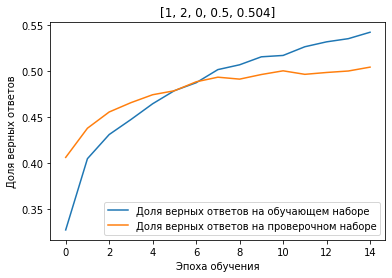

Epoch 1/15
391/391 [==============================] - 3s 7ms/step - loss: 2.1234 - accuracy: 0.2331 - val_loss: 1.8369 - val_accuracy: 0.3420
Epoch 2/15
391/391 [==============================] - 3s 7ms/step - loss: 1.8144 - accuracy: 0.3423 - val_loss: 1.6841 - val_accuracy: 0.3926
Epoch 3/15
391/391 [==============================] - 3s 7ms/step - loss: 1.7209 - accuracy: 0.3729 - val_loss: 1.6126 - val_accuracy: 0.4191
Epoch 4/15
391/391 [==============================] - 3s 7ms/step - loss: 1.6712 - accuracy: 0.3929 - val_loss: 1.5848 - val_accuracy: 0.4225
Epoch 5/15
391/391 [==============================] - 3s 7ms/step - loss: 1.6338 - accuracy: 0.4064 - val_loss: 1.5557 - val_accuracy: 0.4380
Epoch 6/15
391/391 [==============================] - 3s 7ms/step - loss: 1.6082 - accuracy: 0.4186 - val_loss: 1.5426 - val_accuracy: 0.4439
Epoch 7/15
391/391 [==============================] - 3s 7ms/step - loss: 1.5909 - accuracy: 0.4239 - val_loss: 1.5171 - val_accuracy: 0.4484
Epoch 

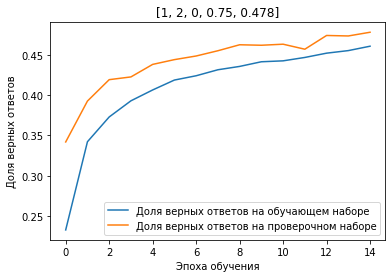

Epoch 1/15
391/391 [==============================] - 3s 8ms/step - loss: 1.6578 - accuracy: 0.4075 - val_loss: 1.4574 - val_accuracy: 0.4790
Epoch 2/15
391/391 [==============================] - 3s 8ms/step - loss: 1.3926 - accuracy: 0.5041 - val_loss: 1.3662 - val_accuracy: 0.5137
Epoch 3/15
391/391 [==============================] - 3s 8ms/step - loss: 1.2907 - accuracy: 0.5414 - val_loss: 1.3166 - val_accuracy: 0.5354
Epoch 4/15
391/391 [==============================] - 3s 8ms/step - loss: 1.2247 - accuracy: 0.5675 - val_loss: 1.3054 - val_accuracy: 0.5352
Epoch 5/15
391/391 [==============================] - 3s 8ms/step - loss: 1.1692 - accuracy: 0.5858 - val_loss: 1.2945 - val_accuracy: 0.5410
Epoch 6/15
391/391 [==============================] - 3s 7ms/step - loss: 1.1262 - accuracy: 0.6004 - val_loss: 1.2963 - val_accuracy: 0.5396
Epoch 7/15
391/391 [==============================] - 3s 7ms/step - loss: 1.0860 - accuracy: 0.6179 - val_loss: 1.3150 - val_accuracy: 0.5422
Epoch 

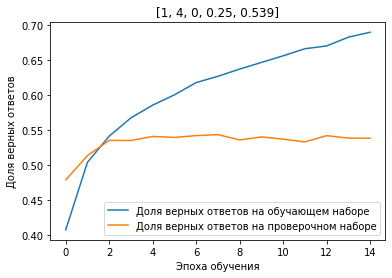

Epoch 1/15
391/391 [==============================] - 3s 8ms/step - loss: 1.7591 - accuracy: 0.3802 - val_loss: 1.5145 - val_accuracy: 0.4653
Epoch 2/15
391/391 [==============================] - 3s 7ms/step - loss: 1.5044 - accuracy: 0.4719 - val_loss: 1.4223 - val_accuracy: 0.4988
Epoch 3/15
391/391 [==============================] - 3s 8ms/step - loss: 1.4081 - accuracy: 0.5045 - val_loss: 1.3473 - val_accuracy: 0.5247
Epoch 4/15
391/391 [==============================] - 3s 8ms/step - loss: 1.3472 - accuracy: 0.5245 - val_loss: 1.3291 - val_accuracy: 0.5316
Epoch 5/15
391/391 [==============================] - 3s 8ms/step - loss: 1.3117 - accuracy: 0.5372 - val_loss: 1.3023 - val_accuracy: 0.5398
Epoch 6/15
391/391 [==============================] - 3s 7ms/step - loss: 1.2749 - accuracy: 0.5474 - val_loss: 1.2985 - val_accuracy: 0.5381
Epoch 7/15
391/391 [==============================] - 3s 7ms/step - loss: 1.2483 - accuracy: 0.5577 - val_loss: 1.2861 - val_accuracy: 0.5439
Epoch 

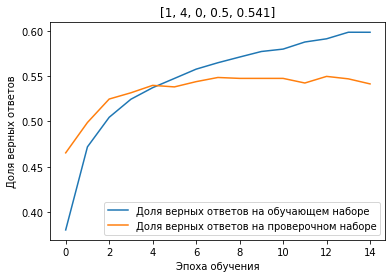

Epoch 1/15
391/391 [==============================] - 3s 8ms/step - loss: 1.8564 - accuracy: 0.3360 - val_loss: 1.6068 - val_accuracy: 0.4332
Epoch 2/15
391/391 [==============================] - 3s 8ms/step - loss: 1.6375 - accuracy: 0.4188 - val_loss: 1.5131 - val_accuracy: 0.4706
Epoch 3/15
391/391 [==============================] - 3s 8ms/step - loss: 1.5632 - accuracy: 0.4460 - val_loss: 1.4618 - val_accuracy: 0.4911
Epoch 4/15
391/391 [==============================] - 3s 7ms/step - loss: 1.5121 - accuracy: 0.4661 - val_loss: 1.4248 - val_accuracy: 0.4993
Epoch 5/15
391/391 [==============================] - 3s 8ms/step - loss: 1.4670 - accuracy: 0.4814 - val_loss: 1.3963 - val_accuracy: 0.5122
Epoch 6/15
391/391 [==============================] - 3s 8ms/step - loss: 1.4297 - accuracy: 0.4935 - val_loss: 1.3585 - val_accuracy: 0.5219
Epoch 7/15
391/391 [==============================] - 3s 8ms/step - loss: 1.4012 - accuracy: 0.5044 - val_loss: 1.3418 - val_accuracy: 0.5256
Epoch 

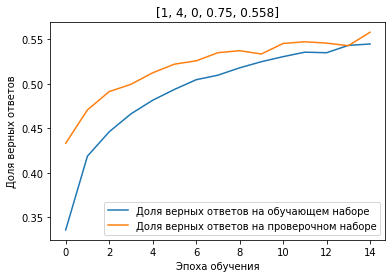

Epoch 1/15
391/391 [==============================] - 4s 9ms/step - loss: 1.5494 - accuracy: 0.4508 - val_loss: 1.3223 - val_accuracy: 0.5311
Epoch 2/15
391/391 [==============================] - 3s 9ms/step - loss: 1.2432 - accuracy: 0.5611 - val_loss: 1.2236 - val_accuracy: 0.5696
Epoch 3/15
391/391 [==============================] - 3s 9ms/step - loss: 1.1375 - accuracy: 0.5983 - val_loss: 1.2047 - val_accuracy: 0.5771
Epoch 4/15
391/391 [==============================] - 3s 9ms/step - loss: 1.0545 - accuracy: 0.6311 - val_loss: 1.1766 - val_accuracy: 0.5864
Epoch 5/15
391/391 [==============================] - 3s 9ms/step - loss: 0.9941 - accuracy: 0.6539 - val_loss: 1.1394 - val_accuracy: 0.6050
Epoch 6/15
391/391 [==============================] - 3s 9ms/step - loss: 0.9297 - accuracy: 0.6756 - val_loss: 1.1478 - val_accuracy: 0.6064
Epoch 7/15
391/391 [==============================] - 3s 9ms/step - loss: 0.8786 - accuracy: 0.6944 - val_loss: 1.1480 - val_accuracy: 0.6048
Epoch 

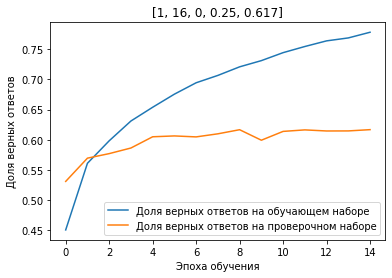

Epoch 1/15
391/391 [==============================] - 4s 10ms/step - loss: 1.5200 - accuracy: 0.4617 - val_loss: 1.2999 - val_accuracy: 0.5403
Epoch 2/15
391/391 [==============================] - 3s 9ms/step - loss: 1.2468 - accuracy: 0.5614 - val_loss: 1.2118 - val_accuracy: 0.5706
Epoch 3/15
391/391 [==============================] - 3s 9ms/step - loss: 1.1453 - accuracy: 0.5952 - val_loss: 1.1630 - val_accuracy: 0.5858
Epoch 4/15
391/391 [==============================] - 3s 8ms/step - loss: 1.0723 - accuracy: 0.6247 - val_loss: 1.1431 - val_accuracy: 0.5938
Epoch 5/15
391/391 [==============================] - 3s 9ms/step - loss: 1.0178 - accuracy: 0.6428 - val_loss: 1.1645 - val_accuracy: 0.5940
Epoch 6/15
391/391 [==============================] - 4s 9ms/step - loss: 0.9798 - accuracy: 0.6557 - val_loss: 1.1392 - val_accuracy: 0.5991
Epoch 7/15
391/391 [==============================] - 3s 9ms/step - loss: 0.9376 - accuracy: 0.6704 - val_loss: 1.1178 - val_accuracy: 0.6117
Epoch

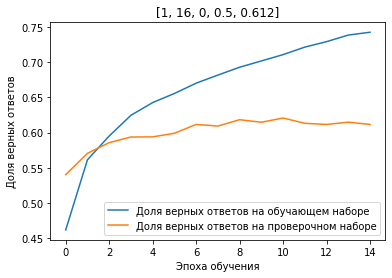

Epoch 1/15
391/391 [==============================] - 4s 9ms/step - loss: 1.7110 - accuracy: 0.3883 - val_loss: 1.3818 - val_accuracy: 0.5047
Epoch 2/15
391/391 [==============================] - 3s 9ms/step - loss: 1.4056 - accuracy: 0.4993 - val_loss: 1.2767 - val_accuracy: 0.5445
Epoch 3/15
391/391 [==============================] - 3s 8ms/step - loss: 1.3126 - accuracy: 0.5355 - val_loss: 1.2327 - val_accuracy: 0.5596
Epoch 4/15
391/391 [==============================] - 3s 9ms/step - loss: 1.2530 - accuracy: 0.5594 - val_loss: 1.1878 - val_accuracy: 0.5795
Epoch 5/15
391/391 [==============================] - 3s 9ms/step - loss: 1.2068 - accuracy: 0.5719 - val_loss: 1.1645 - val_accuracy: 0.5935
Epoch 6/15
391/391 [==============================] - 3s 9ms/step - loss: 1.1782 - accuracy: 0.5872 - val_loss: 1.1343 - val_accuracy: 0.6045
Epoch 7/15
391/391 [==============================] - 3s 9ms/step - loss: 1.1443 - accuracy: 0.5967 - val_loss: 1.1235 - val_accuracy: 0.6043
Epoch 

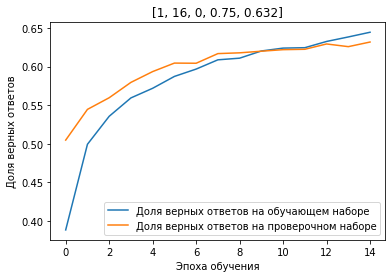

In [ ]:
# Эксперементируем на одном сверточном слое
# без использования MaxPooling2D и
# при разных модификациях других параметрах архитектуры
F = [2, 4, 16]  # Кол-во нейронов(фильтров) в сверточных слоях
D = [0.25, 0.5, 0.75]  # Dropout
for f_ in F:
    flag = True
    for d_ in D:
        flag = True
        # Создаем последовательную модель
        model = Sequential()
        model.add(BatchNormalization(input_shape=(32, 32, 3)))
        # Первый сверточный слой
        model.add(Conv2D(f_, (3, 3), padding='same', activation='relu'))
        # Слой регуляризации Dropout
        model.add(Dropout(d_))

        # Слой преобразования данных из 2D представления в плоское
        model.add(Flatten())
        # Полносвязный слой для классификации
        model.add(Dense(64, activation='relu'))
        # Выходной полносвязный слой
        model.add(Dense(10, activation='softmax'))

        # Компилируем сеть
        model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

        # Обучаем сеть на данных mnist
        history = model.fit(x_train10,
                            y_train10,
                            batch_size=128,
                            epochs=15,
                            validation_data=(x_test10, y_test10),
                            verbose=1)

        data = data + [[1, f_, 0, d_, round(model.evaluate(x_test10, y_test10, verbose=0)[1], 3)]]
        plt.plot(history.history['accuracy'], 
        label='Доля верных ответов на обучающем наборе')
        plt.plot(history.history['val_accuracy'], 
        label='Доля верных ответов на проверочном наборе')
        plt.xlabel('Эпоха обучения')
        plt.ylabel('Доля верных ответов')
        plt.title(data[-1])
        plt.legend()
        plt.show()
        if (d_ == 0.75): flag = False

    if (flag == True): 
      data = data + [[1, f_, 0, d_, round(model.evaluate(x_test10, y_test10, verbose=0)[1], 3)]]
      plt.plot(history.history['accuracy'], 
      label='Доля верных ответов на обучающем наборе')
      plt.plot(history.history['val_accuracy'], 
      label='Доля верных ответов на проверочном наборе')
      plt.xlabel('Эпоха обучения')
      plt.ylabel('Доля верных ответов')
      plt.title(data[-1])
      plt.legend()
      plt.show()


Epoch 1/15
391/391 [==============================] - 3s 8ms/step - loss: 1.9091 - accuracy: 0.3269 - val_loss: 1.7213 - val_accuracy: 0.4037
Epoch 2/15
391/391 [==============================] - 3s 7ms/step - loss: 1.6594 - accuracy: 0.4190 - val_loss: 1.5950 - val_accuracy: 0.4452
Epoch 3/15
391/391 [==============================] - 3s 7ms/step - loss: 1.5646 - accuracy: 0.4497 - val_loss: 1.5481 - val_accuracy: 0.4572
Epoch 4/15
391/391 [==============================] - 3s 7ms/step - loss: 1.5101 - accuracy: 0.4700 - val_loss: 1.5227 - val_accuracy: 0.4615
Epoch 5/15
391/391 [==============================] - 3s 7ms/step - loss: 1.4674 - accuracy: 0.4831 - val_loss: 1.5018 - val_accuracy: 0.4696
Epoch 6/15
391/391 [==============================] - 3s 7ms/step - loss: 1.4310 - accuracy: 0.4934 - val_loss: 1.4918 - val_accuracy: 0.4764
Epoch 7/15
391/391 [==============================] - 3s 7ms/step - loss: 1.4032 - accuracy: 0.5051 - val_loss: 1.4901 - val_accuracy: 0.4779
Epoch 

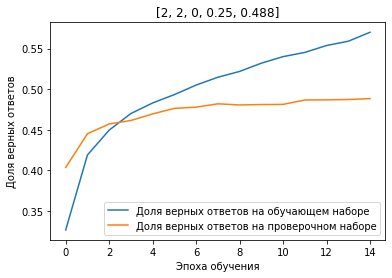

Epoch 1/15
391/391 [==============================] - 3s 8ms/step - loss: 1.8605 - accuracy: 0.3436 - val_loss: 1.6557 - val_accuracy: 0.4222
Epoch 2/15
391/391 [==============================] - 3s 8ms/step - loss: 1.6397 - accuracy: 0.4181 - val_loss: 1.5647 - val_accuracy: 0.4470
Epoch 3/15
391/391 [==============================] - 3s 8ms/step - loss: 1.5662 - accuracy: 0.4432 - val_loss: 1.5043 - val_accuracy: 0.4633
Epoch 4/15
391/391 [==============================] - 3s 8ms/step - loss: 1.5238 - accuracy: 0.4572 - val_loss: 1.4726 - val_accuracy: 0.4754
Epoch 5/15
391/391 [==============================] - 3s 8ms/step - loss: 1.4841 - accuracy: 0.4725 - val_loss: 1.4477 - val_accuracy: 0.4861
Epoch 6/15
391/391 [==============================] - 3s 8ms/step - loss: 1.4562 - accuracy: 0.4856 - val_loss: 1.4441 - val_accuracy: 0.4849
Epoch 7/15
391/391 [==============================] - 3s 8ms/step - loss: 1.4304 - accuracy: 0.4895 - val_loss: 1.4186 - val_accuracy: 0.4918
Epoch 

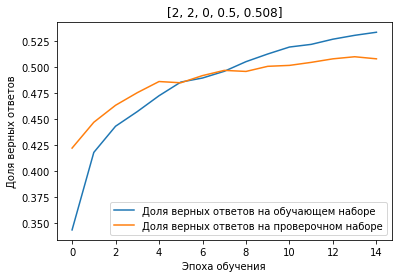

Epoch 1/15
391/391 [==============================] - 3s 8ms/step - loss: 1.9035 - accuracy: 0.3063 - val_loss: 1.6426 - val_accuracy: 0.4189
Epoch 2/15
391/391 [==============================] - 3s 8ms/step - loss: 1.6982 - accuracy: 0.3881 - val_loss: 1.5653 - val_accuracy: 0.4373
Epoch 3/15
391/391 [==============================] - 3s 8ms/step - loss: 1.6433 - accuracy: 0.4056 - val_loss: 1.5287 - val_accuracy: 0.4505
Epoch 4/15
391/391 [==============================] - 3s 8ms/step - loss: 1.6025 - accuracy: 0.4208 - val_loss: 1.5074 - val_accuracy: 0.4616
Epoch 5/15
391/391 [==============================] - 3s 8ms/step - loss: 1.5728 - accuracy: 0.4327 - val_loss: 1.4757 - val_accuracy: 0.4760
Epoch 6/15
391/391 [==============================] - 3s 8ms/step - loss: 1.5515 - accuracy: 0.4407 - val_loss: 1.4626 - val_accuracy: 0.4753
Epoch 7/15
391/391 [==============================] - 3s 8ms/step - loss: 1.5241 - accuracy: 0.4485 - val_loss: 1.4370 - val_accuracy: 0.4823
Epoch 

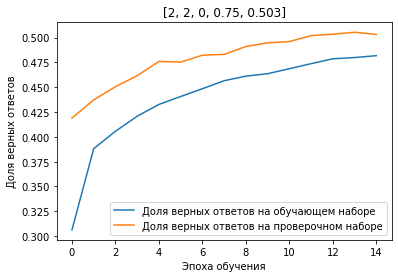

Epoch 1/15
391/391 [==============================] - 4s 9ms/step - loss: 1.7376 - accuracy: 0.3771 - val_loss: 1.4784 - val_accuracy: 0.4764
Epoch 2/15
391/391 [==============================] - 3s 8ms/step - loss: 1.4021 - accuracy: 0.5013 - val_loss: 1.3525 - val_accuracy: 0.5205
Epoch 3/15
391/391 [==============================] - 3s 8ms/step - loss: 1.2967 - accuracy: 0.5394 - val_loss: 1.3160 - val_accuracy: 0.5365
Epoch 4/15
391/391 [==============================] - 3s 8ms/step - loss: 1.2302 - accuracy: 0.5634 - val_loss: 1.2832 - val_accuracy: 0.5429
Epoch 5/15
391/391 [==============================] - 3s 8ms/step - loss: 1.1702 - accuracy: 0.5857 - val_loss: 1.2651 - val_accuracy: 0.5472
Epoch 6/15
391/391 [==============================] - 3s 8ms/step - loss: 1.1249 - accuracy: 0.6009 - val_loss: 1.2639 - val_accuracy: 0.5525
Epoch 7/15
391/391 [==============================] - 3s 8ms/step - loss: 1.0912 - accuracy: 0.6145 - val_loss: 1.2782 - val_accuracy: 0.5541
Epoch 

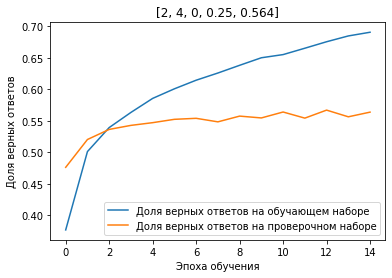

Epoch 1/15
391/391 [==============================] - 3s 9ms/step - loss: 1.7538 - accuracy: 0.3713 - val_loss: 1.4777 - val_accuracy: 0.4717
Epoch 2/15
391/391 [==============================] - 3s 8ms/step - loss: 1.4609 - accuracy: 0.4803 - val_loss: 1.3784 - val_accuracy: 0.5067
Epoch 3/15
391/391 [==============================] - 3s 8ms/step - loss: 1.3696 - accuracy: 0.5119 - val_loss: 1.3122 - val_accuracy: 0.5326
Epoch 4/15
391/391 [==============================] - 3s 9ms/step - loss: 1.3117 - accuracy: 0.5361 - val_loss: 1.2899 - val_accuracy: 0.5404
Epoch 5/15
391/391 [==============================] - 4s 9ms/step - loss: 1.2719 - accuracy: 0.5476 - val_loss: 1.2694 - val_accuracy: 0.5448
Epoch 6/15
391/391 [==============================] - 4s 9ms/step - loss: 1.2320 - accuracy: 0.5647 - val_loss: 1.2554 - val_accuracy: 0.5523
Epoch 7/15
391/391 [==============================] - 3s 8ms/step - loss: 1.2028 - accuracy: 0.5742 - val_loss: 1.2400 - val_accuracy: 0.5575
Epoch 

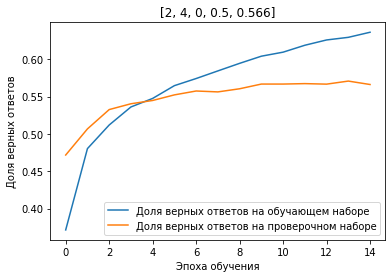

Epoch 1/15
391/391 [==============================] - 3s 9ms/step - loss: 1.8330 - accuracy: 0.3392 - val_loss: 1.5283 - val_accuracy: 0.4558
Epoch 2/15
391/391 [==============================] - 3s 8ms/step - loss: 1.5566 - accuracy: 0.4427 - val_loss: 1.4007 - val_accuracy: 0.4959
Epoch 3/15
391/391 [==============================] - 3s 8ms/step - loss: 1.4715 - accuracy: 0.4733 - val_loss: 1.3438 - val_accuracy: 0.5107
Epoch 4/15
391/391 [==============================] - 3s 8ms/step - loss: 1.4153 - accuracy: 0.4925 - val_loss: 1.3164 - val_accuracy: 0.5267
Epoch 5/15
391/391 [==============================] - 3s 8ms/step - loss: 1.3749 - accuracy: 0.5088 - val_loss: 1.2772 - val_accuracy: 0.5462
Epoch 6/15
391/391 [==============================] - 3s 8ms/step - loss: 1.3427 - accuracy: 0.5205 - val_loss: 1.2629 - val_accuracy: 0.5464
Epoch 7/15
391/391 [==============================] - 3s 8ms/step - loss: 1.3156 - accuracy: 0.5293 - val_loss: 1.2391 - val_accuracy: 0.5545
Epoch 

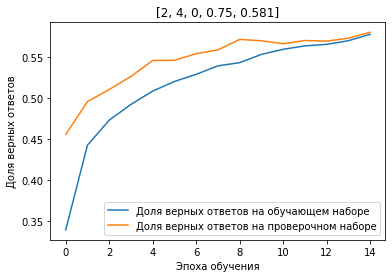

Epoch 1/15
391/391 [==============================] - 5s 13ms/step - loss: 1.5212 - accuracy: 0.4584 - val_loss: 1.2637 - val_accuracy: 0.5526
Epoch 2/15
391/391 [==============================] - 5s 12ms/step - loss: 1.1369 - accuracy: 0.6006 - val_loss: 1.1342 - val_accuracy: 0.6024
Epoch 3/15
391/391 [==============================] - 5s 12ms/step - loss: 0.9875 - accuracy: 0.6556 - val_loss: 1.0683 - val_accuracy: 0.6250
Epoch 4/15
391/391 [==============================] - 5s 12ms/step - loss: 0.8818 - accuracy: 0.6923 - val_loss: 1.0490 - val_accuracy: 0.6280
Epoch 5/15
391/391 [==============================] - 5s 12ms/step - loss: 0.7941 - accuracy: 0.7229 - val_loss: 1.0468 - val_accuracy: 0.6383
Epoch 6/15
391/391 [==============================] - 5s 12ms/step - loss: 0.7201 - accuracy: 0.7488 - val_loss: 1.0758 - val_accuracy: 0.6403
Epoch 7/15
391/391 [==============================] - 5s 12ms/step - loss: 0.6533 - accuracy: 0.7727 - val_loss: 1.1404 - val_accuracy: 0.6286

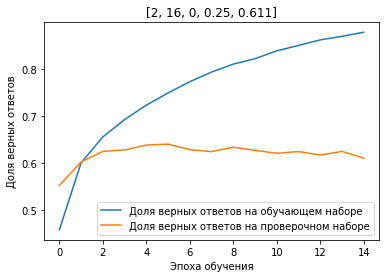

Epoch 1/15
391/391 [==============================] - 5s 13ms/step - loss: 1.4685 - accuracy: 0.4775 - val_loss: 1.2039 - val_accuracy: 0.5664
Epoch 2/15
391/391 [==============================] - 5s 12ms/step - loss: 1.1424 - accuracy: 0.5959 - val_loss: 1.0944 - val_accuracy: 0.6105
Epoch 3/15
391/391 [==============================] - 5s 12ms/step - loss: 1.0163 - accuracy: 0.6444 - val_loss: 1.0460 - val_accuracy: 0.6278
Epoch 4/15
391/391 [==============================] - 5s 12ms/step - loss: 0.9263 - accuracy: 0.6761 - val_loss: 1.0339 - val_accuracy: 0.6440
Epoch 5/15
391/391 [==============================] - 5s 12ms/step - loss: 0.8594 - accuracy: 0.6971 - val_loss: 1.0127 - val_accuracy: 0.6478
Epoch 6/15
391/391 [==============================] - 5s 12ms/step - loss: 0.8034 - accuracy: 0.7148 - val_loss: 1.0232 - val_accuracy: 0.6476
Epoch 7/15
391/391 [==============================] - 5s 12ms/step - loss: 0.7465 - accuracy: 0.7370 - val_loss: 1.0125 - val_accuracy: 0.6494

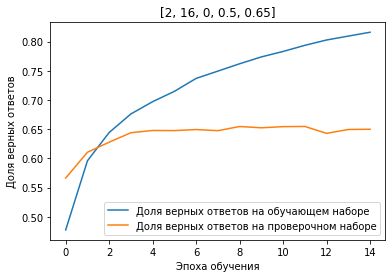

Epoch 1/15
391/391 [==============================] - 5s 13ms/step - loss: 1.5385 - accuracy: 0.4485 - val_loss: 1.2818 - val_accuracy: 0.5428
Epoch 2/15
391/391 [==============================] - 5s 12ms/step - loss: 1.2571 - accuracy: 0.5512 - val_loss: 1.1409 - val_accuracy: 0.5957
Epoch 3/15
391/391 [==============================] - 5s 12ms/step - loss: 1.1430 - accuracy: 0.5919 - val_loss: 1.0960 - val_accuracy: 0.6117
Epoch 4/15
391/391 [==============================] - 5s 12ms/step - loss: 1.0586 - accuracy: 0.6227 - val_loss: 1.0240 - val_accuracy: 0.6352
Epoch 5/15
391/391 [==============================] - 5s 12ms/step - loss: 0.9958 - accuracy: 0.6472 - val_loss: 0.9971 - val_accuracy: 0.6471
Epoch 6/15
391/391 [==============================] - 5s 12ms/step - loss: 0.9455 - accuracy: 0.6617 - val_loss: 0.9791 - val_accuracy: 0.6562
Epoch 7/15
391/391 [==============================] - 5s 12ms/step - loss: 0.9136 - accuracy: 0.6735 - val_loss: 0.9639 - val_accuracy: 0.6604

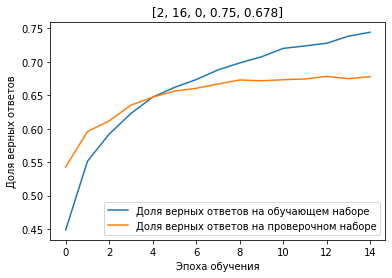

In [ ]:
# Эксперементируем на двух сверточных слоях
# без использования MaxPooling2D и  
# при разных модификациях других параметрах архитектуры
F = [2, 4, 16]  # Кол-во нейронов(фильтров) в сверточных слоях
D = [0.25, 0.5, 0.75]  # Dropout
for f_ in F:
    flag = True
    for d_ in D:
        flag = True
        # Создаем последовательную модель
        model = Sequential()
        model.add(BatchNormalization(input_shape=(32, 32, 3)))
        # Первый сверточный слой
        model.add(Conv2D(f_, (3, 3), padding='same', activation='relu'))
        # Второй сверточный слой
        model.add(Conv2D(f_, (3, 3), padding='same', activation='relu'))
        # Слой регуляризации Dropout
        model.add(Dropout(d_))

        # Слой преобразования данных из 2D представления в плоское
        model.add(Flatten())
        # Полносвязный слой для классификации
        model.add(Dense(64, activation='relu'))
        # Выходной полносвязный слой
        model.add(Dense(10, activation='softmax'))

        # Компилируем сеть
        model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

        # Обучаем сеть на данных mnist
        history = model.fit(x_train10,
                            y_train10,
                            batch_size=128,
                            epochs=15,
                            validation_data=(x_test10, y_test10),
                            verbose=1)

        data = data + [[2, f_, 0, d_, round(model.evaluate(x_test10, y_test10, verbose=0)[1], 3)]]
        plt.plot(history.history['accuracy'], 
        label='Доля верных ответов на обучающем наборе')
        plt.plot(history.history['val_accuracy'], 
        label='Доля верных ответов на проверочном наборе')
        plt.xlabel('Эпоха обучения')
        plt.ylabel('Доля верных ответов')
        plt.title(data[-1])
        plt.legend()
        plt.show()
        if (d_ == 0.75): flag = False

    if (flag == True): 
      data = data + [[2, f_, 0, d_, round(model.evaluate(x_test10, y_test10, verbose=0)[1], 3)]]
      plt.plot(history.history['accuracy'], 
      label='Доля верных ответов на обучающем наборе')
      plt.plot(history.history['val_accuracy'], 
      label='Доля верных ответов на проверочном наборе')
      plt.xlabel('Эпоха обучения')
      plt.ylabel('Доля верных ответов')
      plt.title(data[-1])
      plt.legend()
      plt.show()



Epoch 1/15
391/391 [==============================] - 3s 7ms/step - loss: 1.9097 - accuracy: 0.3194 - val_loss: 1.7169 - val_accuracy: 0.4036
Epoch 2/15
391/391 [==============================] - 3s 7ms/step - loss: 1.6605 - accuracy: 0.4221 - val_loss: 1.6096 - val_accuracy: 0.4324
Epoch 3/15
391/391 [==============================] - 3s 6ms/step - loss: 1.5709 - accuracy: 0.4494 - val_loss: 1.5783 - val_accuracy: 0.4401
Epoch 4/15
391/391 [==============================] - 3s 6ms/step - loss: 1.5194 - accuracy: 0.4665 - val_loss: 1.5362 - val_accuracy: 0.4575
Epoch 5/15
391/391 [==============================] - 3s 7ms/step - loss: 1.4785 - accuracy: 0.4803 - val_loss: 1.5143 - val_accuracy: 0.4685
Epoch 6/15
391/391 [==============================] - 3s 7ms/step - loss: 1.4471 - accuracy: 0.4905 - val_loss: 1.5359 - val_accuracy: 0.4575
Epoch 7/15
391/391 [==============================] - 3s 7ms/step - loss: 1.4185 - accuracy: 0.5005 - val_loss: 1.4929 - val_accuracy: 0.4742
Epoch 

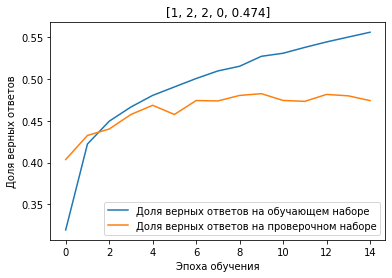

Epoch 1/15
391/391 [==============================] - 3s 7ms/step - loss: 1.8500 - accuracy: 0.3372 - val_loss: 1.6872 - val_accuracy: 0.3982
Epoch 2/15
391/391 [==============================] - 3s 7ms/step - loss: 1.6471 - accuracy: 0.4069 - val_loss: 1.6186 - val_accuracy: 0.4188
Epoch 3/15
391/391 [==============================] - 3s 7ms/step - loss: 1.5660 - accuracy: 0.4361 - val_loss: 1.5379 - val_accuracy: 0.4425
Epoch 4/15
391/391 [==============================] - 3s 6ms/step - loss: 1.5115 - accuracy: 0.4577 - val_loss: 1.4942 - val_accuracy: 0.4617
Epoch 5/15
391/391 [==============================] - 3s 7ms/step - loss: 1.4723 - accuracy: 0.4748 - val_loss: 1.4666 - val_accuracy: 0.4725
Epoch 6/15
391/391 [==============================] - 3s 7ms/step - loss: 1.4405 - accuracy: 0.4869 - val_loss: 1.4405 - val_accuracy: 0.4830
Epoch 7/15
391/391 [==============================] - 3s 7ms/step - loss: 1.4140 - accuracy: 0.4954 - val_loss: 1.4346 - val_accuracy: 0.4829
Epoch 

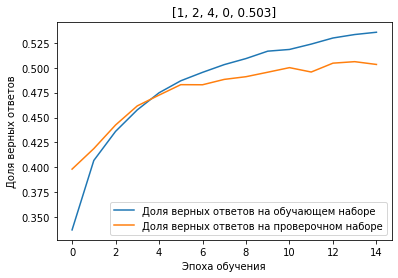

Epoch 1/15
391/391 [==============================] - 3s 8ms/step - loss: 1.6901 - accuracy: 0.3970 - val_loss: 1.4849 - val_accuracy: 0.4721
Epoch 2/15
391/391 [==============================] - 3s 7ms/step - loss: 1.4180 - accuracy: 0.5012 - val_loss: 1.3893 - val_accuracy: 0.5061
Epoch 3/15
391/391 [==============================] - 3s 7ms/step - loss: 1.3304 - accuracy: 0.5346 - val_loss: 1.3493 - val_accuracy: 0.5258
Epoch 4/15
391/391 [==============================] - 3s 7ms/step - loss: 1.2726 - accuracy: 0.5542 - val_loss: 1.3198 - val_accuracy: 0.5408
Epoch 5/15
391/391 [==============================] - 3s 7ms/step - loss: 1.2284 - accuracy: 0.5714 - val_loss: 1.3094 - val_accuracy: 0.5423
Epoch 6/15
391/391 [==============================] - 3s 7ms/step - loss: 1.1914 - accuracy: 0.5858 - val_loss: 1.2853 - val_accuracy: 0.5508
Epoch 7/15
391/391 [==============================] - 3s 8ms/step - loss: 1.1605 - accuracy: 0.5964 - val_loss: 1.2811 - val_accuracy: 0.5568
Epoch 

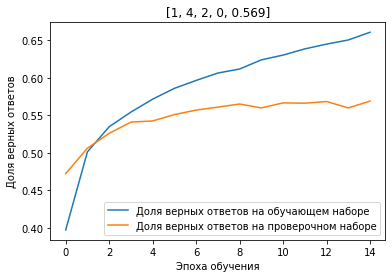

Epoch 1/15
391/391 [==============================] - 3s 8ms/step - loss: 1.7842 - accuracy: 0.3659 - val_loss: 1.5594 - val_accuracy: 0.4506
Epoch 2/15
391/391 [==============================] - 3s 7ms/step - loss: 1.5071 - accuracy: 0.4684 - val_loss: 1.4525 - val_accuracy: 0.4865
Epoch 3/15
391/391 [==============================] - 3s 7ms/step - loss: 1.4175 - accuracy: 0.5030 - val_loss: 1.4191 - val_accuracy: 0.5030
Epoch 4/15
391/391 [==============================] - 3s 7ms/step - loss: 1.3606 - accuracy: 0.5233 - val_loss: 1.3374 - val_accuracy: 0.5295
Epoch 5/15
391/391 [==============================] - 3s 7ms/step - loss: 1.3165 - accuracy: 0.5412 - val_loss: 1.3213 - val_accuracy: 0.5364
Epoch 6/15
391/391 [==============================] - 3s 7ms/step - loss: 1.2782 - accuracy: 0.5539 - val_loss: 1.3074 - val_accuracy: 0.5433
Epoch 7/15
391/391 [==============================] - 3s 7ms/step - loss: 1.2510 - accuracy: 0.5642 - val_loss: 1.2830 - val_accuracy: 0.5548
Epoch 

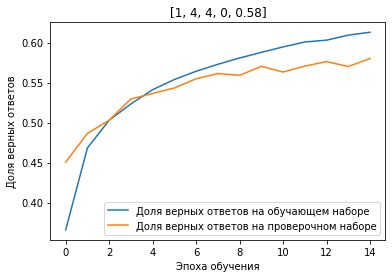

Epoch 1/15
391/391 [==============================] - 3s 8ms/step - loss: 1.4679 - accuracy: 0.4801 - val_loss: 1.2729 - val_accuracy: 0.5487
Epoch 2/15
391/391 [==============================] - 3s 8ms/step - loss: 1.1801 - accuracy: 0.5858 - val_loss: 1.1593 - val_accuracy: 0.5996
Epoch 3/15
391/391 [==============================] - 3s 8ms/step - loss: 1.0651 - accuracy: 0.6261 - val_loss: 1.0929 - val_accuracy: 0.6165
Epoch 4/15
391/391 [==============================] - 3s 8ms/step - loss: 0.9763 - accuracy: 0.6612 - val_loss: 1.0723 - val_accuracy: 0.6258
Epoch 5/15
391/391 [==============================] - 3s 8ms/step - loss: 0.9224 - accuracy: 0.6785 - val_loss: 1.0378 - val_accuracy: 0.6387
Epoch 6/15
391/391 [==============================] - 3s 8ms/step - loss: 0.8719 - accuracy: 0.6974 - val_loss: 1.0277 - val_accuracy: 0.6458
Epoch 7/15
391/391 [==============================] - 3s 8ms/step - loss: 0.8300 - accuracy: 0.7120 - val_loss: 1.0493 - val_accuracy: 0.6379
Epoch 

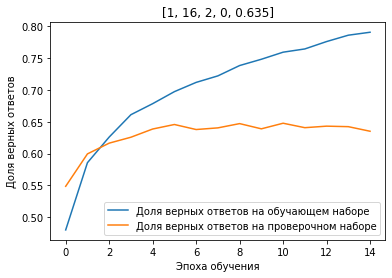

Epoch 1/15
391/391 [==============================] - 3s 8ms/step - loss: 1.5713 - accuracy: 0.4424 - val_loss: 1.3534 - val_accuracy: 0.5226
Epoch 2/15
391/391 [==============================] - 3s 7ms/step - loss: 1.2602 - accuracy: 0.5581 - val_loss: 1.2077 - val_accuracy: 0.5724
Epoch 3/15
391/391 [==============================] - 3s 7ms/step - loss: 1.1484 - accuracy: 0.6007 - val_loss: 1.1523 - val_accuracy: 0.5988
Epoch 4/15
391/391 [==============================] - 3s 7ms/step - loss: 1.0781 - accuracy: 0.6261 - val_loss: 1.1166 - val_accuracy: 0.6130
Epoch 5/15
391/391 [==============================] - 3s 7ms/step - loss: 1.0326 - accuracy: 0.6432 - val_loss: 1.0638 - val_accuracy: 0.6314
Epoch 6/15
391/391 [==============================] - 3s 7ms/step - loss: 1.0004 - accuracy: 0.6552 - val_loss: 1.0559 - val_accuracy: 0.6266
Epoch 7/15
391/391 [==============================] - 3s 7ms/step - loss: 0.9730 - accuracy: 0.6639 - val_loss: 1.0371 - val_accuracy: 0.6428
Epoch 

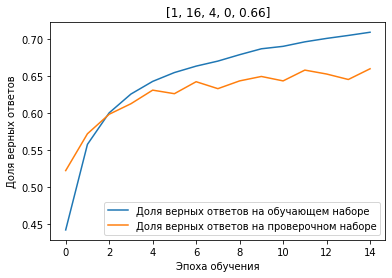

In [ ]:
# Эксперементируем на одном сверточном слое без Dropout при разных модификациях других параметрах архитектуры
F = [2, 4, 16]  # Кол-во нейронов(фильтров) в сверточных слоях
M = [2, 4]  # параметр pool_size, MaxPooling2D
for f_ in F:
        flag = True
        for m_ in M:
            flag = True
            #Создаем последовательную модель
            model = Sequential()
            model.add(BatchNormalization(input_shape=(32, 32, 3)))
            #Первый сверточный слой
            model.add(Conv2D(f_, (3, 3), padding='same', activation='relu'))
            #Первый слой подвыборки
            model.add(MaxPooling2D(pool_size=(m_, m_)))
          
            #Слой преобразования данных из 2D представления в плоское
            model.add(Flatten())
            #Полносвязный слой для классификации
            model.add(Dense(64, activation='relu'))
            #Выходной полносвязный слой
            model.add(Dense(10, activation='softmax'))

            # Компилируем сеть
            model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

            # Обучаем сеть на данных mnist
            history = model.fit(x_train10,
                                y_train10,
                                batch_size=128,
                                epochs=15,
                                validation_data=(x_test10, y_test10),
                                verbose=1)

            data = data + [[1, f_, m_, 0, round(model.evaluate(x_test10, y_test10, verbose=0)[1], 3)]]
            plt.plot(history.history['accuracy'], 
            label='Доля верных ответов на обучающем наборе')
            plt.plot(history.history['val_accuracy'], 
            label='Доля верных ответов на проверочном наборе')
            plt.xlabel('Эпоха обучения')
            plt.ylabel('Доля верных ответов')
            plt.title(data[-1])
            plt.legend()
            plt.show()
            if (m_ == 4): flag = False
                
        if (flag == True): 
          data = data + [[1, f_, m_, 0, round(model.evaluate(x_test10, y_test10, verbose=0)[1], 3)]]
          plt.plot(history.history['accuracy'], 
          label='Доля верных ответов на обучающем наборе')
          plt.plot(history.history['val_accuracy'], 
          label='Доля верных ответов на проверочном наборе')
          plt.xlabel('Эпоха обучения')
          plt.ylabel('Доля верных ответов')
          plt.title(data[-1])
          plt.legend()
          plt.show()



Epoch 1/15
391/391 [==============================] - 3s 9ms/step - loss: 1.8382 - accuracy: 0.3378 - val_loss: 1.6317 - val_accuracy: 0.4103
Epoch 2/15
391/391 [==============================] - 3s 8ms/step - loss: 1.5468 - accuracy: 0.4489 - val_loss: 1.4921 - val_accuracy: 0.4626
Epoch 3/15
391/391 [==============================] - 3s 8ms/step - loss: 1.4303 - accuracy: 0.4906 - val_loss: 1.4300 - val_accuracy: 0.4810
Epoch 4/15
391/391 [==============================] - 3s 8ms/step - loss: 1.3684 - accuracy: 0.5137 - val_loss: 1.3995 - val_accuracy: 0.4996
Epoch 5/15
391/391 [==============================] - 3s 8ms/step - loss: 1.3216 - accuracy: 0.5315 - val_loss: 1.3861 - val_accuracy: 0.5003
Epoch 6/15
391/391 [==============================] - 3s 8ms/step - loss: 1.2883 - accuracy: 0.5434 - val_loss: 1.3708 - val_accuracy: 0.5070
Epoch 7/15
391/391 [==============================] - 3s 8ms/step - loss: 1.2561 - accuracy: 0.5559 - val_loss: 1.3586 - val_accuracy: 0.5096
Epoch 

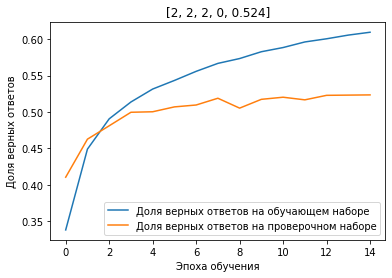

Epoch 1/15
391/391 [==============================] - 3s 9ms/step - loss: 1.9214 - accuracy: 0.3078 - val_loss: 1.7083 - val_accuracy: 0.4008
Epoch 2/15
391/391 [==============================] - 3s 8ms/step - loss: 1.6780 - accuracy: 0.4090 - val_loss: 1.6283 - val_accuracy: 0.4275
Epoch 3/15
391/391 [==============================] - 3s 8ms/step - loss: 1.6080 - accuracy: 0.4357 - val_loss: 1.5816 - val_accuracy: 0.4417
Epoch 4/15
391/391 [==============================] - 3s 8ms/step - loss: 1.5571 - accuracy: 0.4547 - val_loss: 1.5521 - val_accuracy: 0.4531
Epoch 5/15
391/391 [==============================] - 3s 8ms/step - loss: 1.5242 - accuracy: 0.4651 - val_loss: 1.5124 - val_accuracy: 0.4684
Epoch 6/15
391/391 [==============================] - 3s 8ms/step - loss: 1.4923 - accuracy: 0.4768 - val_loss: 1.4928 - val_accuracy: 0.4784
Epoch 7/15
391/391 [==============================] - 3s 8ms/step - loss: 1.4684 - accuracy: 0.4848 - val_loss: 1.4780 - val_accuracy: 0.4837
Epoch 

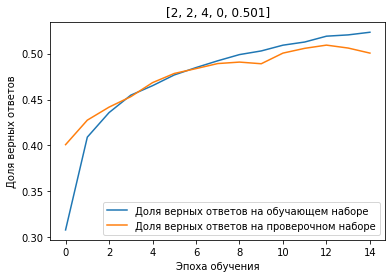

Epoch 1/15
391/391 [==============================] - 4s 9ms/step - loss: 1.6975 - accuracy: 0.3939 - val_loss: 1.4808 - val_accuracy: 0.4763
Epoch 2/15
391/391 [==============================] - 3s 8ms/step - loss: 1.3816 - accuracy: 0.5102 - val_loss: 1.3447 - val_accuracy: 0.5274
Epoch 3/15
391/391 [==============================] - 3s 8ms/step - loss: 1.2688 - accuracy: 0.5529 - val_loss: 1.3064 - val_accuracy: 0.5464
Epoch 4/15
391/391 [==============================] - 3s 8ms/step - loss: 1.2032 - accuracy: 0.5766 - val_loss: 1.2612 - val_accuracy: 0.5608
Epoch 5/15
391/391 [==============================] - 3s 8ms/step - loss: 1.1501 - accuracy: 0.5966 - val_loss: 1.2587 - val_accuracy: 0.5635
Epoch 6/15
391/391 [==============================] - 3s 9ms/step - loss: 1.1040 - accuracy: 0.6124 - val_loss: 1.2296 - val_accuracy: 0.5733
Epoch 7/15
391/391 [==============================] - 3s 8ms/step - loss: 1.0631 - accuracy: 0.6271 - val_loss: 1.2179 - val_accuracy: 0.5758
Epoch 

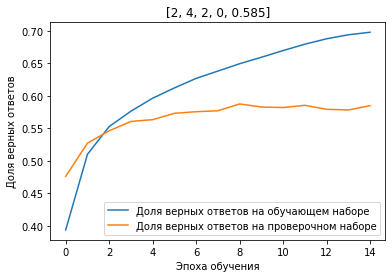

Epoch 1/15
391/391 [==============================] - 3s 9ms/step - loss: 1.7648 - accuracy: 0.3697 - val_loss: 1.5415 - val_accuracy: 0.4419
Epoch 2/15
391/391 [==============================] - 3s 8ms/step - loss: 1.4726 - accuracy: 0.4729 - val_loss: 1.4133 - val_accuracy: 0.5018
Epoch 3/15
391/391 [==============================] - 3s 8ms/step - loss: 1.3807 - accuracy: 0.5108 - val_loss: 1.3528 - val_accuracy: 0.5225
Epoch 4/15
391/391 [==============================] - 3s 8ms/step - loss: 1.3225 - accuracy: 0.5332 - val_loss: 1.3064 - val_accuracy: 0.5379
Epoch 5/15
391/391 [==============================] - 3s 8ms/step - loss: 1.2776 - accuracy: 0.5502 - val_loss: 1.2772 - val_accuracy: 0.5499
Epoch 6/15
391/391 [==============================] - 3s 8ms/step - loss: 1.2381 - accuracy: 0.5647 - val_loss: 1.2537 - val_accuracy: 0.5630
Epoch 7/15
391/391 [==============================] - 3s 8ms/step - loss: 1.2063 - accuracy: 0.5750 - val_loss: 1.2405 - val_accuracy: 0.5682
Epoch 

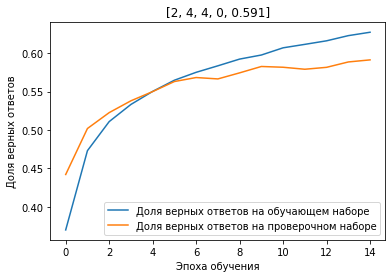

Epoch 1/15
391/391 [==============================] - 4s 11ms/step - loss: 1.4831 - accuracy: 0.4722 - val_loss: 1.2567 - val_accuracy: 0.5508
Epoch 2/15
391/391 [==============================] - 4s 10ms/step - loss: 1.1146 - accuracy: 0.6111 - val_loss: 1.0763 - val_accuracy: 0.6208
Epoch 3/15
391/391 [==============================] - 4s 10ms/step - loss: 0.9718 - accuracy: 0.6601 - val_loss: 1.0300 - val_accuracy: 0.6353
Epoch 4/15
391/391 [==============================] - 4s 10ms/step - loss: 0.8836 - accuracy: 0.6931 - val_loss: 1.0074 - val_accuracy: 0.6466
Epoch 5/15
391/391 [==============================] - 4s 10ms/step - loss: 0.8244 - accuracy: 0.7120 - val_loss: 0.9942 - val_accuracy: 0.6569
Epoch 6/15
391/391 [==============================] - 4s 10ms/step - loss: 0.7702 - accuracy: 0.7306 - val_loss: 1.0439 - val_accuracy: 0.6454
Epoch 7/15
391/391 [==============================] - 4s 10ms/step - loss: 0.7189 - accuracy: 0.7473 - val_loss: 1.0559 - val_accuracy: 0.6477

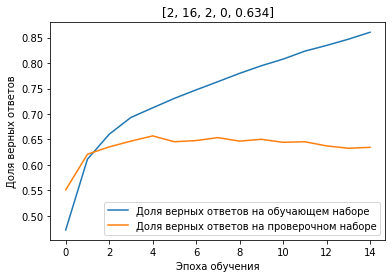

Epoch 1/15
391/391 [==============================] - 4s 10ms/step - loss: 1.5258 - accuracy: 0.4513 - val_loss: 1.2536 - val_accuracy: 0.5578
Epoch 2/15
391/391 [==============================] - 4s 10ms/step - loss: 1.1796 - accuracy: 0.5865 - val_loss: 1.1079 - val_accuracy: 0.6103
Epoch 3/15
391/391 [==============================] - 4s 10ms/step - loss: 1.0623 - accuracy: 0.6306 - val_loss: 1.0735 - val_accuracy: 0.6230
Epoch 4/15
391/391 [==============================] - 4s 10ms/step - loss: 0.9858 - accuracy: 0.6562 - val_loss: 1.0103 - val_accuracy: 0.6420
Epoch 5/15
391/391 [==============================] - 4s 10ms/step - loss: 0.9296 - accuracy: 0.6740 - val_loss: 0.9823 - val_accuracy: 0.6586
Epoch 6/15
391/391 [==============================] - 4s 10ms/step - loss: 0.8866 - accuracy: 0.6903 - val_loss: 0.9776 - val_accuracy: 0.6575
Epoch 7/15
391/391 [==============================] - 4s 10ms/step - loss: 0.8467 - accuracy: 0.7037 - val_loss: 0.9638 - val_accuracy: 0.6666

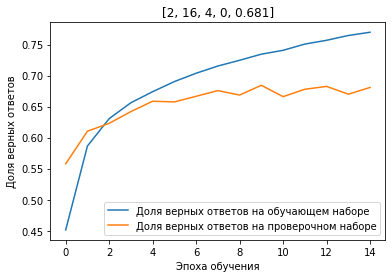

In [ ]:
# Эксперементируем на двух сверточных слоях без Dropout при разных модификациях других параметрах архитектуры
F = [2, 4, 16]  # Кол-во нейронов(фильтров) в сверточных слоях
M = [2, 4]  # параметр pool_size, MaxPooling2D
for f_ in F:
    flag = True
    for m_ in M:
        flag = True
        # Создаем последовательную модель
        model = Sequential()
        model.add(BatchNormalization(input_shape=(32, 32, 3)))
        # Первый сверточный слой
        model.add(Conv2D(f_, (3, 3), padding='same', activation='relu'))
        # Второй сверточный слой
        model.add(Conv2D(f_, (3, 3), padding='same', activation='relu'))
        # Первый слой подвыборки
        model.add(MaxPooling2D(pool_size=(m_, m_)))

        # Слой преобразования данных из 2D представления в плоское
        model.add(Flatten())
        # Полносвязный слой для классификации
        model.add(Dense(64, activation='relu'))
        # Выходной полносвязный слой
        model.add(Dense(10, activation='softmax'))

        # Компилируем сеть
        model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

        # Обучаем сеть на данных mnist
        history = model.fit(x_train10,
                            y_train10,
                            batch_size=128,
                            epochs=15,
                            validation_data=(x_test10, y_test10),
                            verbose=1)

        data = data + [[2, f_, m_, 0, round(model.evaluate(x_test10, y_test10, verbose=0)[1], 3)]]
        plt.plot(history.history['accuracy'], 
        label='Доля верных ответов на обучающем наборе')
        plt.plot(history.history['val_accuracy'], 
        label='Доля верных ответов на проверочном наборе')
        plt.xlabel('Эпоха обучения')
        plt.ylabel('Доля верных ответов')
        plt.title(data[-1])
        plt.legend()
        plt.show()
        if (m_ == 4): flag = False

    if (flag == True): 
      data = data + [[2, f_, m_, 0, round(model.evaluate(x_test10, y_test10, verbose=0)[1], 3)]]
      plt.plot(history.history['accuracy'], 
      label='Доля верных ответов на обучающем наборе')
      plt.plot(history.history['val_accuracy'], 
      label='Доля верных ответов на проверочном наборе')
      plt.xlabel('Эпоха обучения')
      plt.ylabel('Доля верных ответов')
      plt.title(data[-1])
      plt.legend()
      plt.show()



#### **Таблица:**
* **number_of_Conv2D_ayers** - Количество слоев conv2_d 
* **neurons(filters)** - Количество нейронов (фильтров)
* **MaxPooling2D** - Размер MaxPooling2D(2- это 2 на 2), или его отсутствие если значение равно 0 
* **Dropout** - Размер Dropout
* **val_accuracy** - Точность классификации данных на проверочной выборке

In [ ]:
import pandas as pd # Подключаем библиотеку Pandas
df = pd.DataFrame(data, columns=['number_of_Conv2D_layers', 'neurons(filters)', 'MaxPooling2D', 'Dropout', 'val_accuracy'])
df

,number_of_Conv2D_layers,neurons(filters),MaxPooling2D,Dropout,val_accuracy
0,2,2,0,0.00,0.465
1,2,4,0,0.00,0.527
2,2,16,0,0.00,0.584
3,1,2,2,0.25,0.508
4,1,2,4,0.25,0.509
...,...,...,...,...,...
64,2,2,4,0.00,0.501
65,2,4,2,0.00,0.585
66,2,4,4,0.00,0.591
67,2,16,2,0.00,0.634


In [ ]:
# Сохранение итоговой таблицы в файл
writer = pd.ExcelWriter('df_data.xlsx')
df.to_excel(writer, 'Sheet1')
writer.save()
files.download('df_data.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### **Выводы:** 

В результате проведенных экспериментов (69 вариантов архитектуры нейронной сети), была составлена сводная таблица помещенная в Excel файл и для каждого эксперимента были построены графики показывающие долю верных ответов на проверочном и обучающем наборе данных на всех эпохах обучения. Выводы проводились исходя из построенных графиков и анализа табличных данных посредством их фильтрации в программе Excel.

1. Если посчитать среднее значение точности классификации данных на проверочной выборке в экспериментах с одним и двумя сверточными слоями, то средняя точность выше в экспериментах с двумя сверточными слоями.
2. Если отфильтровать таблицу по количеству нейронов, то можно заметить что точность классификации данных на проверочной выборке растет с ростом количества нейронов. Максимальная точность была достигнута в эксперименте с количеством 16 - максимальном в данном эксперименте. Всвязи с этим можно говорить о тот что количество нейронов в сверточном слое влияет на точность прямо пропорционально(по крайней мере если говорить о возрастании от 2 до 16 и на конкретной архитектуре)
3. Эксперименты на двух сверточных слоях без Dropout без MaxPooling2D, дали самые маленькие точности и высокий процент переобучения, что говорит о важности наличия Dropout и MaxPooling2D.
4. Эксперименты с архитектурой без MaxPooling2D но с Dropout, дали очень низкую точность, и средний процент переобучения, что еще раз подтверждает важность наличия MaxPooling2D для повышения точности классификации.
5. Эксперименты на одном сверточном слое при наличием MaxPooling2D и Dropout, дали самый маленький процент переобучения, из чего следует, что их наличие предотвращает (уменьшает вероятность) переобучения.
6. Максимум и минимум: 
* Максимальная точность была достигнута при параметрах:
 * 1 сверточный слой
 * 16 нейрона в Conv2D
 * 4*4 размер MaxPooling2D
 * Dropout: 0.25
* Минимальная точность была достигнута при параметрах:
 * 1 сверточный слой
 * 2 нейрона в Conv2D
 * 4*4 размер MaxPooling2D
 * Dropout: 0.75

Из этих результатах (min и max) можно говорить о том что слишком большой размер Dropout ухудшает точность классификации. Как и говорилось в п.2 количество нейронов в сверточном слое влияет на точность прямо пропорционально(по крайней мере если говорить о возрастании от 2 до 16 и на конкретной архитектуре)



## **ULTRA PRO**

Подберите собственную базу изображений и разделите ее на классы для классификации. Подберите архитектуру сверточной нейронной сети и добейтесь точности классификации данных Вашей базы не менее 85% на проверочной выборке.

In [ ]:
from tensorflow.keras.datasets import mnist #Загружаем базу mnist
from tensorflow.keras.datasets import cifar10 #Загружаем базу cifar10
from tensorflow.keras.datasets import cifar100 #Загружаем базу cifar100

from tensorflow.keras.models import Sequential #Сеть прямого распространения
#Базовые слои для счёрточных сетей
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator # работа с изображениями
from tensorflow.keras.optimizers import Adam, Adadelta # оптимизаторы
from tensorflow.keras import utils #Используем дял to_categoricall
from tensorflow.keras.preprocessing import image #Для отрисовки изображений
from google.colab import files #Для загрузки своей картинки
import numpy as np #Библиотека работы с массивами
import matplotlib.pyplot as plt #Для отрисовки графиков
from PIL import Image #Для отрисовки изображений
import random #Для генерации случайных чисел 
import math # Для округления
import os #Для работы с файлами 
# подключем диск
from google.colab import drive

%matplotlib inline

База данных цветов "Flovers" была собрана собственноручно и включает в себя 3 класса по 200 изображений в каждом. Классы: герберы, розы, лилии. Дабы избежать заучивания по цветовой характеристики(например, если красный - значит роза), данные в базе подобранны максимально нормализованно - приблизительно равное количество цветков одного цвета в каждой из категорий.

In [ ]:
!unzip -q "/content/drive/My Drive/Flovers.zip" -d /content #Указываем путь к базе в Google Drive

In [ ]:
train_path = '/content/Flovers' #Папка с папками картинок, рассортированных по категориям
batch_size = 10 #Размер выборки
img_width = 100 #Ширина изображения
img_height = 100 #Высота изображения

In [ ]:
#Генератор изображений
datagen = ImageDataGenerator(
    rescale=1. / 255, #Значения цвета меняем на дробные показания
    rotation_range=10, #Поворачиваем изображения при генерации выборки
    width_shift_range=0.1, #Двигаем изображения по ширине при генерации выборки
    height_shift_range=0.1, #Двигаем изображения по высоте при генерации выборки
    zoom_range=0.1, #Зумируем изображения при генерации выборки
    horizontal_flip=False, #Отключаем отзеркаливание изображений
    fill_mode='nearest', #Заполнение пикселей вне границ ввода
    validation_split=0.17 #Указываем разделение изображений на обучающую и тестовую выборку
)

# обучающая выборка
train_generator = datagen.flow_from_directory(
    train_path, #Путь ко всей выборке выборке
    target_size=(img_height, img_width), #Размер изображений
    batch_size=batch_size, #Размер batch_size
    class_mode='categorical', #Категориальный тип выборки. Разбиение выборки по виду растения
    shuffle=True, #Перемешивание выборки
    subset='training' # устанавливаем как набор для обучения
)

# проверочная выборка
validation_generator = datagen.flow_from_directory(
    train_path, #Путь ко всей выборке выборке
    target_size=(img_height, img_width), #Размер изображений
    batch_size=batch_size, #Размер batch_size
    class_mode='categorical', #Категориальный тип выборки. Разбиение выборки по виду растения
    shuffle=True, #Перемешивание выборки
    subset='validation' # устанавливаем как валидационный набор
)

Found 498 images belonging to 3 classes.
Found 102 images belonging to 3 classes.


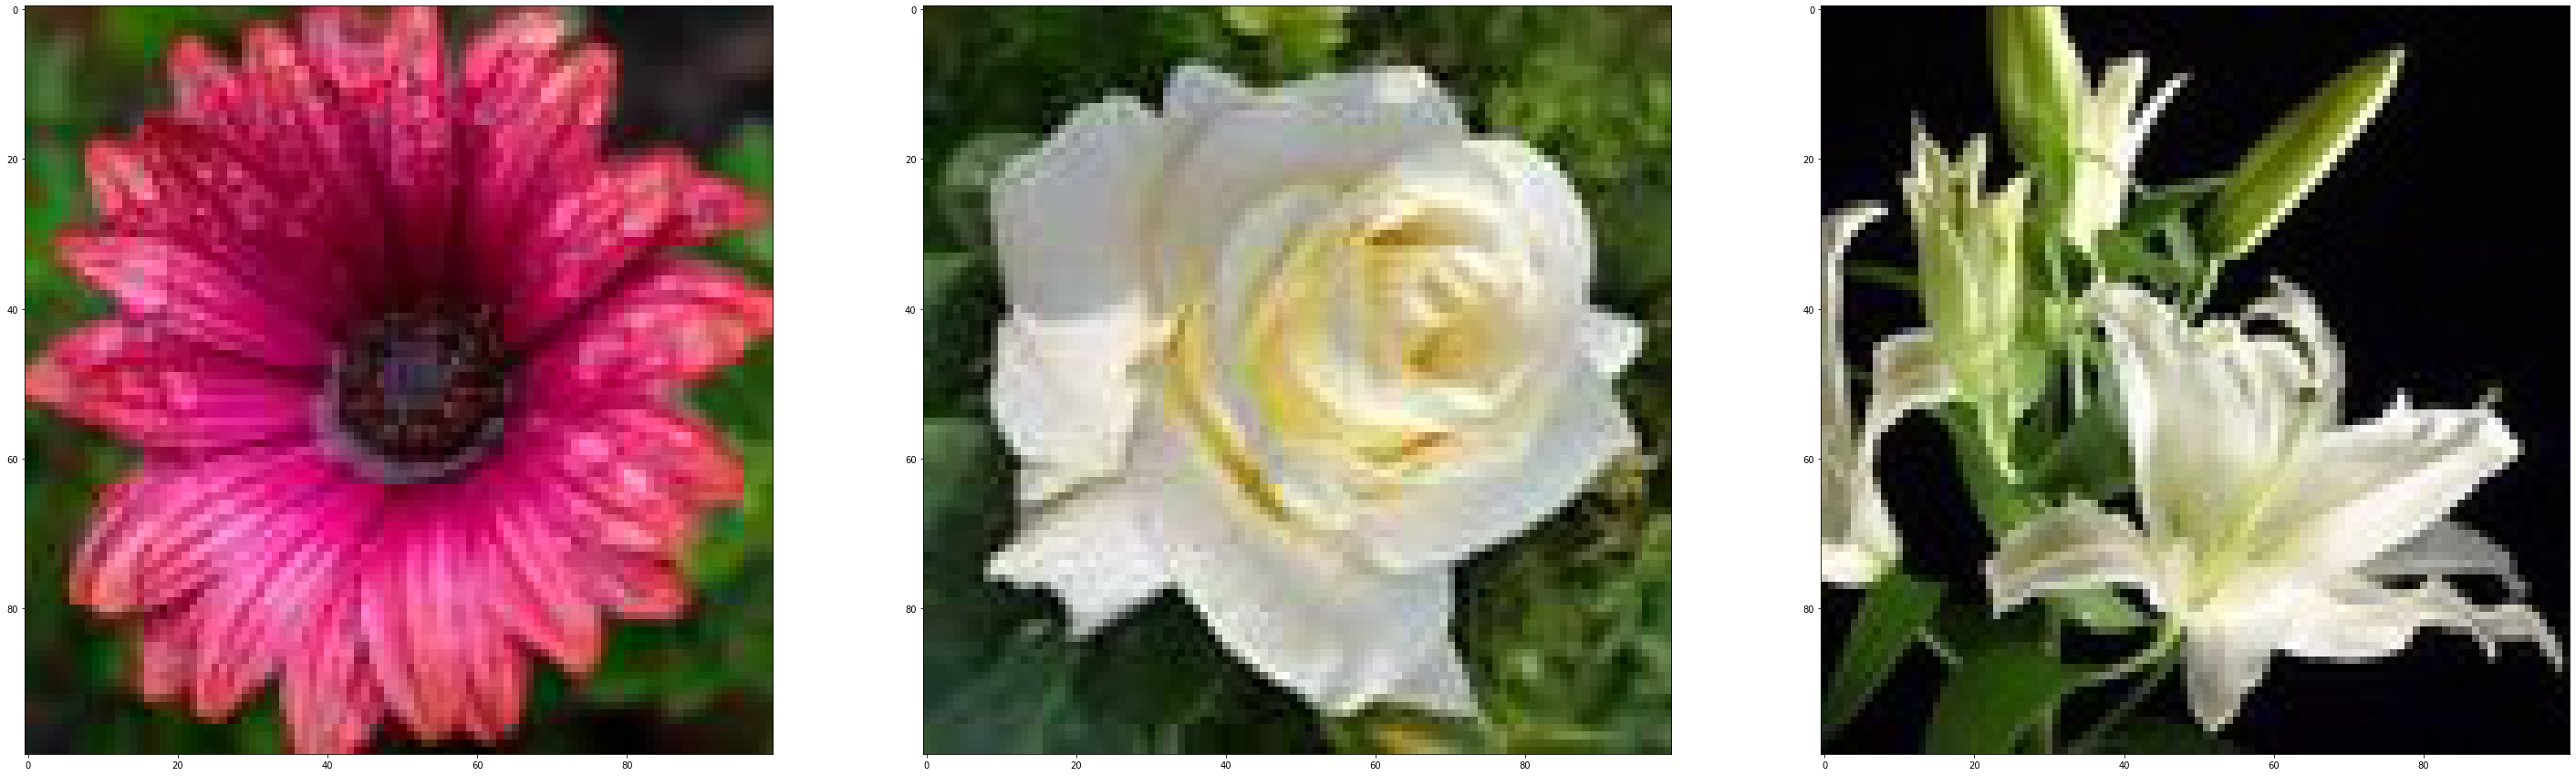

In [ ]:
#Выводим для примера картинки по каждому классу

fig, axs = plt.subplots(1, 3, figsize=(50, 50)) #Создаем полотно из 3 графиков
for i in range(3): #Проходим по всем классам
  flovers_path = train_path + '/' + os.listdir(train_path)[i] + '/'#Формируем путь к выборке
  img_path = flovers_path + random.choice(os.listdir(flovers_path)) #Выбираем случайное фото для отображения
  axs[i].imshow(image.load_img(img_path, target_size=(img_height, img_width))) #Отображение фотографии

plt.show() #Показываем изображения

In [ ]:
#Создаем последовательную модель
model = Sequential()
#Первый сверточный слой
model.add(Conv2D(256, (3, 3), padding='same', activation='relu', input_shape=(img_height, img_width, 3)))
#Второй сверточный слой
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#Третий сверточный слой
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
#Слой регуляризации Dropout
#model.add(Dropout(0.1))
#Четвертый сверточный слой
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.1))
#Пятый сверточный слой
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
#Шестой сверточный слой
model.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
#model.add(Dropout(0.1))
#Слой преобразования двумерных данных в одномерные 
model.add(Flatten())
#Полносвязный слой
model.add(Dense(2048, activation='relu'))
#Полносвязный слой
model.add(Dense(4096, activation='relu'))
#Вызодной полносвязный слой
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.00001), metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs=45,
    verbose=1
)

Epoch 1/45
49/49 [==============================] - 22s 444ms/step - loss: 1.0939 - accuracy: 0.3381 - val_loss: 1.0650 - val_accuracy: 0.3600
Epoch 2/45
49/49 [==============================] - 19s 397ms/step - loss: 1.0439 - accuracy: 0.4467 - val_loss: 0.9405 - val_accuracy: 0.4600
Epoch 3/45
49/49 [==============================] - 19s 396ms/step - loss: 0.9927 - accuracy: 0.5123 - val_loss: 0.9185 - val_accuracy: 0.5700
Epoch 4/45
49/49 [==============================] - 19s 397ms/step - loss: 0.9342 - accuracy: 0.5574 - val_loss: 0.8277 - val_accuracy: 0.7000
Epoch 5/45
49/49 [==============================] - 19s 396ms/step - loss: 0.9183 - accuracy: 0.5635 - val_loss: 0.8018 - val_accuracy: 0.7100
Epoch 6/45
49/49 [==============================] - 19s 397ms/step - loss: 0.8172 - accuracy: 0.6352 - val_loss: 0.7398 - val_accuracy: 0.6800
Epoch 7/45
49/49 [==============================] - 19s 396ms/step - loss: 0.7173 - accuracy: 0.6947 - val_loss: 0.6648 - val_accuracy: 0.7200

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 256)     7168      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 256)     590080    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 256)       590080    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 256)       590080    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 25, 25, 256)       0

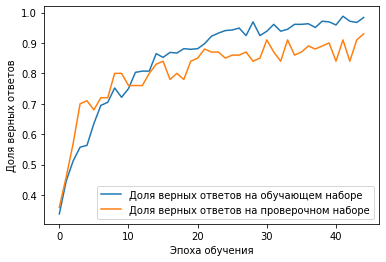

In [ ]:
#Оображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
last_val_accuracy = history.history['val_accuracy'][-1]
print("Точность классификации данных на проверочной выборке:", last_val_accuracy)

Точность классификации данных на проверочной выборке: 0.9300000071525574


**Итог:** Для собранной базы цветов, в созданной для нее нейронной сети, точность классификации данных на проверочной выборке составила 0.93%, что можно считать отличным результатом, учитывая размер собранной базы!